<a href="https://colab.research.google.com/github/Jade-Cartagena/QSAR-QSPR-Predictive-Models/blob/Predictive-Models/Artificial_Neural_Network_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve,
                            average_precision_score, f1_score)
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

[02:44:32] WARNING: not removing hydrogen atom without neighbors



=== Fold 1/3 ===
Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2893 - auc: 0.5302 - loss: 0.8270

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.2895 - auc: 0.5296 - loss: 0.8271 - val_accuracy: 0.4692 - val_auc: 0.5851 - val_loss: 0.7242 - learning_rate: 1.0000e-04
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2990 - auc: 0.5516 - loss: 0.8094  

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2993 - auc: 0.5517 - loss: 0.8098 - val_accuracy: 0.5813 - val_auc: 0.6220 - val_loss: 0.7167 - learning_rate: 1.0000e-04
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3154 - auc: 0.5513 - loss: 0.8113  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3147 - auc: 0.5520 - loss: 0.8107 - val_accuracy: 0.5640 - val_auc: 0.6581 - val_loss: 0.7104 - learning_rate: 1.0000e-04
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3017 - auc: 0.5747 - loss: 0.7957 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3019 - auc: 0.5764 - loss: 0.7949 - val_accuracy: 0.5185 - val_auc: 0.6878 - val_loss: 0.7044 - learning_rate: 1.0000e-04
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3108 - auc: 0.6028 - loss: 0.7872 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3115 - auc: 0.6034 - loss: 0.7861 - val_accuracy: 0.5345 - val_auc: 0.7112 - val_loss: 0.6979 - learning_rate: 1.0000e-04
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3125 - auc: 0.6146 - loss: 0.7714 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3123 - auc: 0.6152 - loss: 0.7709 - val_accuracy: 0.5480 - val_auc: 0.7330 - val_loss: 0.6909 - learning_rate: 1.0000e-04
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3487 - auc: 0.6409 - loss: 0.7474  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3476 - auc: 0.6409 - loss: 0.7480 - val_accuracy: 0.5567 - val_auc: 0.7506 - val_loss: 0.6838 - learning_rate: 1.0000e-04
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3579 - auc: 0.6547 - loss: 0.7345 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3560 - auc: 0.6553 - loss: 0.7342 - val_accuracy: 0.5246 - val_auc: 0.7647 - val_loss: 0.6758 - learning_rate: 1.0000e-04
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3378 - auc: 0.6685 - loss: 0.7263 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3396 - auc: 0.6694 - loss: 0.7257 - val_accuracy: 0.5037 - val_auc: 0.7789 - val_loss: 0.6679 - learning_rate: 1.0000e-04
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3629 - auc: 0.6802 - loss: 0.7238 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3643 - auc: 0.6813 - loss: 0.7226 - val_accuracy: 0.5148 - val_auc: 0.7898 - val_loss: 0.6601 - learning_rate: 1.0000e-04
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3603 - auc: 0.6904 - loss: 0.7115 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3600 - auc: 0.6912 - loss: 0.7109 - val_accuracy: 0.5222 - val_auc: 0.7984 - val_loss: 0.6520 - learning_rate: 1.0000e-04
Epoch 12/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3929 - auc: 0.7266 - loss: 0.6791

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3907 - auc: 0.7244 - loss: 0.6820 - val_accuracy: 0.5222 - val_auc: 0.8064 - val_loss: 0.6437 - learning_rate: 1.0000e-04
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3778 - auc: 0.7002 - loss: 0.7019 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3779 - auc: 0.7014 - loss: 0.7014 - val_accuracy: 0.4557 - val_auc: 0.8138 - val_loss: 0.6354 - learning_rate: 1.0000e-04
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3600 - auc: 0.7269 - loss: 0.6833  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3616 - auc: 0.7268 - loss: 0.6830 - val_accuracy: 0.4372 - val_auc: 0.8209 - val_loss: 0.6276 - learning_rate: 1.0000e-04
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4010 - auc: 0.7492 - loss: 0.6540 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4013 - auc: 0.7491 - loss: 0.6542 - val_accuracy: 0.4372 - val_auc: 0.8266 - val_loss: 0.6198 - learning_rate: 1.0000e-04
Epoch 16/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3999 - auc: 0.7412 - loss: 0.6690  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4009 - auc: 0.7417 - loss: 0.6680 - val_accuracy: 0.4384 - val_auc: 0.8323 - val_loss: 0.6123 - learning_rate: 1.0000e-04
Epoch 17/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4046 - auc: 0.7501 - loss: 0.6536  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4052 - auc: 0.7493 - loss: 0.6547 - val_accuracy: 0.4372 - val_auc: 0.8379 - val_loss: 0.6052 - learning_rate: 1.0000e-04
Epoch 18/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4089 - auc: 0.7628 - loss: 0.6455 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4082 - auc: 0.7624 - loss: 0.6459 - val_accuracy: 0.4397 - val_auc: 0.8429 - val_loss: 0.5983 - learning_rate: 1.0000e-04
Epoch 19/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4243 - auc: 0.7649 - loss: 0.6436 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4254 - auc: 0.7649 - loss: 0.6434 - val_accuracy: 0.4421 - val_auc: 0.8478 - val_loss: 0.5917 - learning_rate: 1.0000e-04
Epoch 20/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4315 - auc: 0.7757 - loss: 0.6253 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4309 - auc: 0.7757 - loss: 0.6257 - val_accuracy: 0.4372 - val_auc: 0.8516 - val_loss: 0.5853 - learning_rate: 1.0000e-04
Epoch 21/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4472 - auc: 0.7798 - loss: 0.6232  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4464 - auc: 0.7800 - loss: 0.6228 - val_accuracy: 0.4372 - val_auc: 0.8555 - val_loss: 0.5791 - learning_rate: 1.0000e-04
Epoch 22/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4477 - auc: 0.7764 - loss: 0.6226  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4483 - auc: 0.7775 - loss: 0.6217 - val_accuracy: 0.4372 - val_auc: 0.8590 - val_loss: 0.5729 - learning_rate: 1.0000e-04
Epoch 23/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4439 - auc: 0.7825 - loss: 0.6177

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4477 - auc: 0.7850 - loss: 0.6158 - val_accuracy: 0.4360 - val_auc: 0.8624 - val_loss: 0.5666 - learning_rate: 1.0000e-04
Epoch 24/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4428 - auc: 0.7748 - loss: 0.6307 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4425 - auc: 0.7759 - loss: 0.6294 - val_accuracy: 0.4397 - val_auc: 0.8653 - val_loss: 0.5607 - learning_rate: 1.0000e-04
Epoch 25/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4543 - auc: 0.8004 - loss: 0.5993 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4543 - auc: 0.8005 - loss: 0.5989 - val_accuracy: 0.4409 - val_auc: 0.8677 - val_loss: 0.5548 - learning_rate: 1.0000e-04
Epoch 26/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5069 - auc: 0.8021 - loss: 0.5997  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5045 - auc: 0.8022 - loss: 0.5996 - val_accuracy: 0.4421 - val_auc: 0.8703 - val_loss: 0.5492 - learning_rate: 1.0000e-04
Epoch 27/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4839 - auc: 0.8092 - loss: 0.5883 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4822 - auc: 0.8091 - loss: 0.5884 - val_accuracy: 0.4458 - val_auc: 0.8724 - val_loss: 0.5437 - learning_rate: 1.0000e-04
Epoch 28/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4773 - auc: 0.8084 - loss: 0.5857

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4729 - auc: 0.8084 - loss: 0.5866 - val_accuracy: 0.4458 - val_auc: 0.8743 - val_loss: 0.5386 - learning_rate: 1.0000e-04
Epoch 29/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4855 - auc: 0.8192 - loss: 0.5757

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4824 - auc: 0.8185 - loss: 0.5756 - val_accuracy: 0.4458 - val_auc: 0.8761 - val_loss: 0.5336 - learning_rate: 1.0000e-04
Epoch 30/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4857 - auc: 0.8157 - loss: 0.5823

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4902 - auc: 0.8181 - loss: 0.5787 - val_accuracy: 0.4458 - val_auc: 0.8778 - val_loss: 0.5292 - learning_rate: 1.0000e-04
Epoch 31/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4923 - auc: 0.8317 - loss: 0.5596 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4915 - auc: 0.8314 - loss: 0.5587 - val_accuracy: 0.4433 - val_auc: 0.8795 - val_loss: 0.5245 - learning_rate: 1.0000e-04
Epoch 32/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4822 - auc: 0.8150 - loss: 0.5739 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5030 - auc: 0.8249 - loss: 0.5624 - val_accuracy: 0.4433 - val_auc: 0.8810 - val_loss: 0.5199 - learning_rate: 1.0000e-04
Epoch 33/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5039 - auc: 0.8223 - loss: 0.5745

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5016 - auc: 0.8310 - loss: 0.5597 - val_accuracy: 0.4458 - val_auc: 0.8825 - val_loss: 0.5155 - learning_rate: 1.0000e-04
Epoch 34/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4929 - auc: 0.8364 - loss: 0.5464 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4939 - auc: 0.8373 - loss: 0.5454 - val_accuracy: 0.4446 - val_auc: 0.8843 - val_loss: 0.5113 - learning_rate: 1.0000e-04
Epoch 35/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5261 - auc: 0.8442 - loss: 0.5378

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5267 - auc: 0.8450 - loss: 0.5370 - val_accuracy: 0.4458 - val_auc: 0.8855 - val_loss: 0.5072 - learning_rate: 1.0000e-04
Epoch 36/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5117 - auc: 0.8398 - loss: 0.5417 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5116 - auc: 0.8405 - loss: 0.5408 - val_accuracy: 0.4421 - val_auc: 0.8868 - val_loss: 0.5033 - learning_rate: 1.0000e-04
Epoch 37/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5414 - auc: 0.8429 - loss: 0.5399  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5406 - auc: 0.8438 - loss: 0.5385 - val_accuracy: 0.4384 - val_auc: 0.8881 - val_loss: 0.4993 - learning_rate: 1.0000e-04
Epoch 38/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5169 - auc: 0.8387 - loss: 0.5431 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5176 - auc: 0.8400 - loss: 0.5412 - val_accuracy: 0.4360 - val_auc: 0.8893 - val_loss: 0.4956 - learning_rate: 1.0000e-04
Epoch 39/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5183 - auc: 0.8464 - loss: 0.5307

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5209 - auc: 0.8481 - loss: 0.5285 - val_accuracy: 0.4335 - val_auc: 0.8906 - val_loss: 0.4922 - learning_rate: 1.0000e-04
Epoch 40/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5273 - auc: 0.8501 - loss: 0.5241 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5282 - auc: 0.8509 - loss: 0.5231 - val_accuracy: 0.4323 - val_auc: 0.8916 - val_loss: 0.4888 - learning_rate: 1.0000e-04
Epoch 41/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5261 - auc: 0.8570 - loss: 0.5188 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5254 - auc: 0.8569 - loss: 0.5187 - val_accuracy: 0.4323 - val_auc: 0.8928 - val_loss: 0.4855 - learning_rate: 1.0000e-04
Epoch 42/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5250 - auc: 0.8513 - loss: 0.5251

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5319 - auc: 0.8535 - loss: 0.5219 - val_accuracy: 0.4310 - val_auc: 0.8938 - val_loss: 0.4822 - learning_rate: 1.0000e-04
Epoch 43/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5599 - auc: 0.8693 - loss: 0.4994 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5596 - auc: 0.8693 - loss: 0.4995 - val_accuracy: 0.4323 - val_auc: 0.8947 - val_loss: 0.4791 - learning_rate: 1.0000e-04
Epoch 44/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5430 - auc: 0.8751 - loss: 0.4886 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5424 - auc: 0.8746 - loss: 0.4893 - val_accuracy: 0.4323 - val_auc: 0.8959 - val_loss: 0.4760 - learning_rate: 1.0000e-04
Epoch 45/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5618 - auc: 0.8767 - loss: 0.4876 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5593 - auc: 0.8769 - loss: 0.4873 - val_accuracy: 0.4360 - val_auc: 0.8970 - val_loss: 0.4728 - learning_rate: 1.0000e-04
Epoch 46/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5371 - auc: 0.8616 - loss: 0.5075

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5395 - auc: 0.8635 - loss: 0.5049 - val_accuracy: 0.4360 - val_auc: 0.8981 - val_loss: 0.4697 - learning_rate: 1.0000e-04
Epoch 47/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5390 - auc: 0.8698 - loss: 0.4928 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5388 - auc: 0.8707 - loss: 0.4917 - val_accuracy: 0.4372 - val_auc: 0.8991 - val_loss: 0.4666 - learning_rate: 1.0000e-04
Epoch 48/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5345 - auc: 0.8734 - loss: 0.4907 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5354 - auc: 0.8736 - loss: 0.4902 - val_accuracy: 0.4347 - val_auc: 0.8999 - val_loss: 0.4636 - learning_rate: 1.0000e-04
Epoch 49/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5656 - auc: 0.8861 - loss: 0.4685  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5654 - auc: 0.8857 - loss: 0.4690 - val_accuracy: 0.4360 - val_auc: 0.9008 - val_loss: 0.4605 - learning_rate: 1.0000e-04
Epoch 50/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5448 - auc: 0.8816 - loss: 0.4732

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5480 - auc: 0.8824 - loss: 0.4720 - val_accuracy: 0.4384 - val_auc: 0.9016 - val_loss: 0.4579 - learning_rate: 1.0000e-04
Epoch 51/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5582 - auc: 0.8787 - loss: 0.4790

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5601 - auc: 0.8805 - loss: 0.4763 - val_accuracy: 0.4384 - val_auc: 0.9024 - val_loss: 0.4553 - learning_rate: 1.0000e-04
Epoch 52/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5436 - auc: 0.8827 - loss: 0.4735 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5438 - auc: 0.8824 - loss: 0.4738 - val_accuracy: 0.4384 - val_auc: 0.9032 - val_loss: 0.4530 - learning_rate: 1.0000e-04
Epoch 53/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5777 - auc: 0.8982 - loss: 0.4481

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5763 - auc: 0.8962 - loss: 0.4509 - val_accuracy: 0.4397 - val_auc: 0.9039 - val_loss: 0.4505 - learning_rate: 1.0000e-04
Epoch 54/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5745 - auc: 0.8954 - loss: 0.4510 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5697 - auc: 0.8921 - loss: 0.4569 - val_accuracy: 0.4397 - val_auc: 0.9047 - val_loss: 0.4480 - learning_rate: 1.0000e-04
Epoch 55/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5556 - auc: 0.8723 - loss: 0.4856 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5566 - auc: 0.8725 - loss: 0.4852 - val_accuracy: 0.4409 - val_auc: 0.9054 - val_loss: 0.4457 - learning_rate: 1.0000e-04
Epoch 56/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5657 - auc: 0.8940 - loss: 0.4504 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5650 - auc: 0.8932 - loss: 0.4517 - val_accuracy: 0.4409 - val_auc: 0.9062 - val_loss: 0.4435 - learning_rate: 1.0000e-04
Epoch 57/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5521 - auc: 0.8916 - loss: 0.4565 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5549 - auc: 0.8920 - loss: 0.4559 - val_accuracy: 0.4409 - val_auc: 0.9067 - val_loss: 0.4414 - learning_rate: 1.0000e-04
Epoch 58/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5623 - auc: 0.8982 - loss: 0.4440 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5629 - auc: 0.8975 - loss: 0.4452 - val_accuracy: 0.4409 - val_auc: 0.9073 - val_loss: 0.4393 - learning_rate: 1.0000e-04
Epoch 59/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5586 - auc: 0.8953 - loss: 0.4493

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5752 - auc: 0.8960 - loss: 0.4470 - val_accuracy: 0.4409 - val_auc: 0.9080 - val_loss: 0.4372 - learning_rate: 1.0000e-04
Epoch 60/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5574 - auc: 0.8974 - loss: 0.4420 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5588 - auc: 0.8973 - loss: 0.4422 - val_accuracy: 0.4397 - val_auc: 0.9086 - val_loss: 0.4352 - learning_rate: 1.0000e-04
Epoch 61/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5916 - auc: 0.9047 - loss: 0.4315 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5901 - auc: 0.9048 - loss: 0.4314 - val_accuracy: 0.4409 - val_auc: 0.9092 - val_loss: 0.4331 - learning_rate: 1.0000e-04
Epoch 62/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6012 - auc: 0.9069 - loss: 0.4274 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6002 - auc: 0.9061 - loss: 0.4288 - val_accuracy: 0.4409 - val_auc: 0.9096 - val_loss: 0.4310 - learning_rate: 1.0000e-04
Epoch 63/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5784 - auc: 0.9049 - loss: 0.4290 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5816 - auc: 0.9050 - loss: 0.4288 - val_accuracy: 0.4409 - val_auc: 0.9102 - val_loss: 0.4293 - learning_rate: 1.0000e-04
Epoch 64/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5683 - auc: 0.9023 - loss: 0.4335 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5705 - auc: 0.9026 - loss: 0.4330 - val_accuracy: 0.4421 - val_auc: 0.9107 - val_loss: 0.4275 - learning_rate: 1.0000e-04
Epoch 65/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5498 - auc: 0.9024 - loss: 0.4342

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5544 - auc: 0.8998 - loss: 0.4383 - val_accuracy: 0.4421 - val_auc: 0.9110 - val_loss: 0.4261 - learning_rate: 1.0000e-04
Epoch 66/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5709 - auc: 0.9024 - loss: 0.4355 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5707 - auc: 0.9024 - loss: 0.4354 - val_accuracy: 0.4397 - val_auc: 0.9115 - val_loss: 0.4244 - learning_rate: 1.0000e-04
Epoch 67/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5922 - auc: 0.9141 - loss: 0.4120

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5907 - auc: 0.9136 - loss: 0.4129 - val_accuracy: 0.4397 - val_auc: 0.9120 - val_loss: 0.4228 - learning_rate: 1.0000e-04
Epoch 68/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6031 - auc: 0.9127 - loss: 0.4176 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5994 - auc: 0.9121 - loss: 0.4183 - val_accuracy: 0.4397 - val_auc: 0.9124 - val_loss: 0.4212 - learning_rate: 1.0000e-04
Epoch 69/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6045 - auc: 0.9111 - loss: 0.4166 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5950 - auc: 0.9097 - loss: 0.4190 - val_accuracy: 0.4421 - val_auc: 0.9127 - val_loss: 0.4196 - learning_rate: 1.0000e-04
Epoch 70/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5550 - auc: 0.8975 - loss: 0.4378 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5593 - auc: 0.9010 - loss: 0.4328 - val_accuracy: 0.4409 - val_auc: 0.9131 - val_loss: 0.4182 - learning_rate: 1.0000e-04
Epoch 71/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6010 - auc: 0.9149 - loss: 0.4093 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5995 - auc: 0.9144 - loss: 0.4100 - val_accuracy: 0.4409 - val_auc: 0.9135 - val_loss: 0.4170 - learning_rate: 1.0000e-04
Epoch 72/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5877 - auc: 0.9081 - loss: 0.4226 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5875 - auc: 0.9082 - loss: 0.4225 - val_accuracy: 0.4421 - val_auc: 0.9138 - val_loss: 0.4158 - learning_rate: 1.0000e-04
Epoch 73/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5916 - auc: 0.9044 - loss: 0.4280 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5910 - auc: 0.9048 - loss: 0.4272 - val_accuracy: 0.4421 - val_auc: 0.9139 - val_loss: 0.4147 - learning_rate: 1.0000e-04
Epoch 74/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6107 - auc: 0.9148 - loss: 0.4084  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6110 - auc: 0.9148 - loss: 0.4081 - val_accuracy: 0.4495 - val_auc: 0.9144 - val_loss: 0.4135 - learning_rate: 1.0000e-04
Epoch 75/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5777 - auc: 0.9122 - loss: 0.4138 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5783 - auc: 0.9120 - loss: 0.4141 - val_accuracy: 0.4594 - val_auc: 0.9148 - val_loss: 0.4123 - learning_rate: 1.0000e-04
Epoch 76/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5714 - auc: 0.9074 - loss: 0.4221

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5737 - auc: 0.9077 - loss: 0.4212 - val_accuracy: 0.4680 - val_auc: 0.9151 - val_loss: 0.4114 - learning_rate: 1.0000e-04
Epoch 77/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5904 - auc: 0.9202 - loss: 0.3975

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5886 - auc: 0.9196 - loss: 0.3986 - val_accuracy: 0.4828 - val_auc: 0.9152 - val_loss: 0.4104 - learning_rate: 1.0000e-04
Epoch 78/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5903 - auc: 0.9228 - loss: 0.3898

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5922 - auc: 0.9219 - loss: 0.3917 - val_accuracy: 0.4938 - val_auc: 0.9153 - val_loss: 0.4095 - learning_rate: 1.0000e-04
Epoch 79/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5972 - auc: 0.9174 - loss: 0.4023 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5979 - auc: 0.9177 - loss: 0.4019 - val_accuracy: 0.5074 - val_auc: 0.9156 - val_loss: 0.4087 - learning_rate: 1.0000e-04
Epoch 80/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5801 - auc: 0.9164 - loss: 0.4051 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5802 - auc: 0.9164 - loss: 0.4050 - val_accuracy: 0.5062 - val_auc: 0.9160 - val_loss: 0.4078 - learning_rate: 1.0000e-04
Epoch 81/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5869 - auc: 0.9189 - loss: 0.3989 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5873 - auc: 0.9190 - loss: 0.3987 - val_accuracy: 0.5185 - val_auc: 0.9163 - val_loss: 0.4068 - learning_rate: 1.0000e-04
Epoch 82/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5781 - auc: 0.9148 - loss: 0.4072 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5788 - auc: 0.9147 - loss: 0.4073 - val_accuracy: 0.5185 - val_auc: 0.9165 - val_loss: 0.4059 - learning_rate: 1.0000e-04
Epoch 83/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6059 - auc: 0.9275 - loss: 0.3831

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6069 - auc: 0.9257 - loss: 0.3866 - val_accuracy: 0.5197 - val_auc: 0.9167 - val_loss: 0.4049 - learning_rate: 1.0000e-04
Epoch 84/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5969 - auc: 0.9134 - loss: 0.4066 - val_accuracy: 0.5209 - val_auc: 0.9166 - val_loss: 0.4041 - learning_rate: 1.0000e-04
Epoch 85/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5977 - auc: 0.9275 - loss: 0.3799 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5968 - auc: 0.9270 - loss: 0.3810 - val_accuracy: 0.5209 - val_auc: 0.9170 - val_loss: 0.4033 - learning_rate: 1.0000e-04
Epoch 86/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6024 - auc: 0.9290 - loss: 0.3789 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6026 - auc: 0.9293 - loss: 0.3784 - val_accuracy: 0.5209 - val_auc: 0.9172 - val_loss: 0.4027 - learning_rate: 1.0000e-04
Epoch 87/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5983 - auc: 0.9303 - loss: 0.3761 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5969 - auc: 0.9292 - loss: 0.3783 - val_accuracy: 0.5271 - val_auc: 0.9174 - val_loss: 0.4022 - learning_rate: 1.0000e-04
Epoch 88/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5680 - auc: 0.9209 - loss: 0.3931

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5692 - auc: 0.9208 - loss: 0.3933 - val_accuracy: 0.5222 - val_auc: 0.9176 - val_loss: 0.4016 - learning_rate: 1.0000e-04
Epoch 89/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5851 - auc: 0.9222 - loss: 0.3913 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5859 - auc: 0.9223 - loss: 0.3910 - val_accuracy: 0.5271 - val_auc: 0.9177 - val_loss: 0.4010 - learning_rate: 1.0000e-04
Epoch 90/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5895 - auc: 0.9240 - loss: 0.3883

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5890 - auc: 0.9241 - loss: 0.3880 - val_accuracy: 0.5296 - val_auc: 0.9179 - val_loss: 0.4006 - learning_rate: 1.0000e-04
Epoch 91/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5990 - auc: 0.9268 - loss: 0.3801 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6007 - auc: 0.9265 - loss: 0.3807 - val_accuracy: 0.5296 - val_auc: 0.9181 - val_loss: 0.4000 - learning_rate: 1.0000e-04
Epoch 92/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6068 - auc: 0.9222 - loss: 0.3899 - val_accuracy: 0.5283 - val_auc: 0.9179 - val_loss: 0.3996 - learning_rate: 1.0000e-04
Epoch 93/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5931 - auc: 0.9402 - loss: 0.3518 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5922 - auc: 0.9368 - loss: 0.3594 - val_accuracy: 0.5271 - val_auc: 0.9182 - val_loss: 0.3991 - learning_rate: 1.0000e-04
Epoch 94/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6080 - auc: 0.9220 - loss: 0.3913 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6087 - auc: 0.9223 - loss: 0.3908 - val_accuracy: 0.5283 - val_auc: 0.9183 - val_loss: 0.3987 - learning_rate: 1.0000e-04
Epoch 95/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5852 - auc: 0.9311 - loss: 0.3723 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5870 - auc: 0.9305 - loss: 0.3737 - val_accuracy: 0.5296 - val_auc: 0.9184 - val_loss: 0.3982 - learning_rate: 1.0000e-04
Epoch 96/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5925 - auc: 0.9222 - loss: 0.3904 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5941 - auc: 0.9228 - loss: 0.3890 - val_accuracy: 0.5283 - val_auc: 0.9185 - val_loss: 0.3978 - learning_rate: 1.0000e-04
Epoch 97/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6043 - auc: 0.9350 - loss: 0.3654 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6035 - auc: 0.9347 - loss: 0.3658 - val_accuracy: 0.5296 - val_auc: 0.9187 - val_loss: 0.3973 - learning_rate: 1.0000e-04
Epoch 98/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6048 - auc: 0.9220 - loss: 0.3922 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6056 - auc: 0.9228 - loss: 0.3903 - val_accuracy: 0.5296 - val_auc: 0.9188 - val_loss: 0.3970 - learning_rate: 1.0000e-04
Epoch 99/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5943 - auc: 0.9281 - loss: 0.3764

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5922 - auc: 0.9278 - loss: 0.3774 - val_accuracy: 0.5296 - val_auc: 0.9190 - val_loss: 0.3964 - learning_rate: 1.0000e-04
Epoch 100/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6095 - auc: 0.9297 - loss: 0.3746 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6087 - auc: 0.9299 - loss: 0.3743 - val_accuracy: 0.5320 - val_auc: 0.9191 - val_loss: 0.3962 - learning_rate: 1.0000e-04
Epoch 101/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5873 - auc: 0.9277 - loss: 0.3791 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5884 - auc: 0.9280 - loss: 0.3784 - val_accuracy: 0.5320 - val_auc: 0.9191 - val_loss: 0.3959 - learning_rate: 1.0000e-04
Epoch 102/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5893 - auc: 0.9304 - loss: 0.3729 - val_accuracy: 0.5333 - val_auc: 0.9191 - val_loss: 0.3956 - learning_rate: 1.0000e-04
Epoch 103/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6060 - auc: 0.9263 - loss: 0.3804

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6062 - auc: 0.9267 - loss: 0.3796 - val_accuracy: 0.5333 - val_auc: 0.9192 - val_loss: 0.3952 - learning_rate: 1.0000e-04
Epoch 104/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6018 - auc: 0.9302 - loss: 0.3716 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6020 - auc: 0.9302 - loss: 0.3715 - val_accuracy: 0.5369 - val_auc: 0.9194 - val_loss: 0.3950 - learning_rate: 1.0000e-04
Epoch 105/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6085 - auc: 0.9398 - loss: 0.3515 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6070 - auc: 0.9391 - loss: 0.3530 - val_accuracy: 0.5345 - val_auc: 0.9195 - val_loss: 0.3947 - learning_rate: 1.0000e-04
Epoch 106/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - auc: 0.9351 - loss: 0.3605 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5948 - auc: 0.9348 - loss: 0.3613 - val_accuracy: 0.5369 - val_auc: 0.9197 - val_loss: 0.3944 - learning_rate: 1.0000e-04
Epoch 107/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6144 - auc: 0.9326 - loss: 0.3632

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6127 - auc: 0.9329 - loss: 0.3632 - val_accuracy: 0.5308 - val_auc: 0.9197 - val_loss: 0.3940 - learning_rate: 1.0000e-04
Epoch 108/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5850 - auc: 0.9249 - loss: 0.3812 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5936 - auc: 0.9281 - loss: 0.3751 - val_accuracy: 0.5333 - val_auc: 0.9198 - val_loss: 0.3937 - learning_rate: 1.0000e-04
Epoch 109/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6414 - auc: 0.9337 - loss: 0.3641 - val_accuracy: 0.5308 - val_auc: 0.9198 - val_loss: 0.3934 - learning_rate: 1.0000e-04
Epoch 110/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5892 - auc: 0.9355 - loss: 0.3604

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5982 - auc: 0.9342 - loss: 0.3629 - val_accuracy: 0.5271 - val_auc: 0.9199 - val_loss: 0.3932 - learning_rate: 1.0000e-04
Epoch 111/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5927 - auc: 0.9346 - loss: 0.3609 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5928 - auc: 0.9356 - loss: 0.3589 - val_accuracy: 0.5308 - val_auc: 0.9201 - val_loss: 0.3929 - learning_rate: 1.0000e-04
Epoch 112/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6460 - auc: 0.9391 - loss: 0.3519

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6382 - auc: 0.9378 - loss: 0.3543 - val_accuracy: 0.5394 - val_auc: 0.9201 - val_loss: 0.3926 - learning_rate: 1.0000e-04
Epoch 113/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6265 - auc: 0.9366 - loss: 0.3574 - val_accuracy: 0.5333 - val_auc: 0.9201 - val_loss: 0.3924 - learning_rate: 1.0000e-04
Epoch 114/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5928 - auc: 0.9324 - loss: 0.3659 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5938 - auc: 0.9331 - loss: 0.3644 - val_accuracy: 0.5333 - val_auc: 0.9202 - val_loss: 0.3922 - learning_rate: 1.0000e-04
Epoch 115/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6107 - auc: 0.9399 - loss: 0.3499 - val_accuracy: 0.5333 - val_auc: 0.9201 - val_loss: 0.3921 - learning_rate: 1.0000e-04
Epoch 116/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6047 - auc: 0.9396 - loss: 0.3491 - val_accuracy: 0.5283 - val_auc: 0.9202 - val_loss: 0.3919 - learning_rate: 1.0000e-04
Epoch 117/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6166 - auc: 0.9321 - loss: 0.3643  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6162 - auc: 0.9325 - loss: 0.3636 - val_accuracy: 0.5308 - val_auc: 0.9204 - val_loss: 0.3917 - learning_rate: 1.0000e-04
Epoch 118/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6112 - auc: 0.9360 - loss: 0.3584  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6110 - auc: 0.9358 - loss: 0.3589 - val_accuracy: 0.5308 - val_auc: 0.9204 - val_loss: 0.3915 - learning_rate: 1.0000e-04
Epoch 119/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6178 - auc: 0.9404 - loss: 0.3468  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6178 - auc: 0.9402 - loss: 0.3473 - val_accuracy: 0.5320 - val_auc: 0.9205 - val_loss: 0.3913 - learning_rate: 1.0000e-04
Epoch 120/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6240 - auc: 0.9387 - loss: 0.3513

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6198 - auc: 0.9391 - loss: 0.3505 - val_accuracy: 0.5271 - val_auc: 0.9207 - val_loss: 0.3912 - learning_rate: 1.0000e-04
Epoch 121/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6195 - auc: 0.9368 - loss: 0.3550

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6172 - auc: 0.9368 - loss: 0.3553 - val_accuracy: 0.5209 - val_auc: 0.9208 - val_loss: 0.3910 - learning_rate: 1.0000e-04
Epoch 122/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6463 - auc: 0.9424 - loss: 0.3429  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6445 - auc: 0.9418 - loss: 0.3442 - val_accuracy: 0.5234 - val_auc: 0.9210 - val_loss: 0.3909 - learning_rate: 1.0000e-04
Epoch 123/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6252 - auc: 0.9364 - loss: 0.3564

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6245 - auc: 0.9386 - loss: 0.3516 - val_accuracy: 0.5234 - val_auc: 0.9211 - val_loss: 0.3907 - learning_rate: 1.0000e-04
Epoch 124/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6202 - auc: 0.9470 - loss: 0.3313

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6183 - auc: 0.9464 - loss: 0.3329 - val_accuracy: 0.5209 - val_auc: 0.9213 - val_loss: 0.3905 - learning_rate: 1.0000e-04
Epoch 125/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6062 - auc: 0.9414 - loss: 0.3451 - val_accuracy: 0.5222 - val_auc: 0.9212 - val_loss: 0.3903 - learning_rate: 1.0000e-04
Epoch 126/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6263 - auc: 0.9453 - loss: 0.3348 - val_accuracy: 0.5222 - val_auc: 0.9211 - val_loss: 0.3902 - learning_rate: 1.0000e-04
Epoch 127/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6005 - auc: 0.9436 - loss: 0.3394 - val_accuracy: 0.5209 - val_auc: 0.9211 - val_loss: 0.3900 - learning_rate: 1.0000e-04
Epoch 128/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6196 - auc: 0.9409 - loss: 0.3452  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6195 - auc: 0.9411 - loss: 0.3450 - val_accuracy: 0.5209 - val_auc: 0.9213 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 129/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6077 - auc: 0.9426 - loss: 0.3434 - val_accuracy: 0.5222 - val_auc: 0.9213 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 130/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6303 - auc: 0.9406 - loss: 0.3459 - val_accuracy: 0.5197 - val_auc: 0.9213 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 131/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5953 - auc: 0.9407 - loss: 0.3459 - val_accuracy: 0.5222 - val_auc: 0.9213 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 132/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5814 - auc: 0.9496 - loss: 0.3239 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5860 - auc: 0.9476 - loss: 0.3289 - val_accuracy: 0.5234 - val_auc: 0.9214 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 133/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6167 - auc: 0.9334 - loss: 0.3602

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6157 - auc: 0.9348 - loss: 0.3575 - val_accuracy: 0.5234 - val_auc: 0.9215 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 134/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5877 - auc: 0.9352 - loss: 0.3597

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5923 - auc: 0.9372 - loss: 0.3548 - val_accuracy: 0.5222 - val_auc: 0.9216 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 135/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6171 - auc: 0.9422 - loss: 0.3421 - val_accuracy: 0.5234 - val_auc: 0.9215 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 136/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6187 - auc: 0.9508 - loss: 0.3203 - val_accuracy: 0.5234 - val_auc: 0.9216 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 137/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5958 - auc: 0.9421 - loss: 0.3416 - val_accuracy: 0.5234 - val_auc: 0.9216 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 138/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6079 - auc: 0.9464 - loss: 0.3339 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6081 - auc: 0.9463 - loss: 0.3340 - val_accuracy: 0.5234 - val_auc: 0.9216 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 139/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6293 - auc: 0.9471 - loss: 0.3311 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6290 - auc: 0.9470 - loss: 0.3311 - val_accuracy: 0.5271 - val_auc: 0.9218 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 140/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6141 - auc: 0.9389 - loss: 0.3484 - val_accuracy: 0.5271 - val_auc: 0.9217 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 141/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6136 - auc: 0.9416 - loss: 0.3428 - val_accuracy: 0.5296 - val_auc: 0.9216 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 142/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6145 - auc: 0.9395 - loss: 0.3472 - val_accuracy: 0.5296 - val_auc: 0.9217 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 143/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6065 - auc: 0.9422 - loss: 0.3417

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6110 - auc: 0.9433 - loss: 0.3389 - val_accuracy: 0.5296 - val_auc: 0.9218 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 144/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6197 - auc: 0.9518 - loss: 0.3181 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6186 - auc: 0.9517 - loss: 0.3186 - val_accuracy: 0.5296 - val_auc: 0.9219 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 145/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6345 - auc: 0.9450 - loss: 0.3345 - val_accuracy: 0.5296 - val_auc: 0.9218 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 146/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6137 - auc: 0.9471 - loss: 0.3282 - val_accuracy: 0.5271 - val_auc: 0.9218 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 147/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6254 - auc: 0.9472 - loss: 0.3304 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6243 - auc: 0.9469 - loss: 0.3312 - val_accuracy: 0.5283 - val_auc: 0.9219 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 148/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6098 - auc: 0.9407 - loss: 0.3450 - val_accuracy: 0.5259 - val_auc: 0.9218 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 149/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6237 - auc: 0.9463 - loss: 0.3306 - val_accuracy: 0.5296 - val_auc: 0.9219 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 150/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6146 - auc: 0.9478 - loss: 0.3277 - val_accuracy: 0.5308 - val_auc: 0.9218 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 151/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6556 - auc: 0.9518 - loss: 0.3190

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6480 - auc: 0.9515 - loss: 0.3195 - val_accuracy: 0.5333 - val_auc: 0.9220 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 152/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6327 - auc: 0.9529 - loss: 0.3149 - val_accuracy: 0.5406 - val_auc: 0.9219 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 153/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6104 - auc: 0.9475 - loss: 0.3273 - val_accuracy: 0.5431 - val_auc: 0.9219 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 154/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6278 - auc: 0.9517 - loss: 0.3188  

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6282 - auc: 0.9513 - loss: 0.3197 - val_accuracy: 0.5456 - val_auc: 0.9220 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 155/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6433 - auc: 0.9557 - loss: 0.3096

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6365 - auc: 0.9550 - loss: 0.3110 - val_accuracy: 0.5456 - val_auc: 0.9221 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 156/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6087 - auc: 0.9503 - loss: 0.3217

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6114 - auc: 0.9507 - loss: 0.3205 - val_accuracy: 0.5554 - val_auc: 0.9222 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 157/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6203 - auc: 0.9473 - loss: 0.3302 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6201 - auc: 0.9471 - loss: 0.3305 - val_accuracy: 0.5628 - val_auc: 0.9223 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 158/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6338 - auc: 0.9500 - loss: 0.3207

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6377 - auc: 0.9499 - loss: 0.3214 - val_accuracy: 0.5862 - val_auc: 0.9223 - val_loss: 0.3896 - learning_rate: 1.0000e-04
Epoch 159/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6309 - auc: 0.9493 - loss: 0.3230 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6290 - auc: 0.9490 - loss: 0.3238 - val_accuracy: 0.5850 - val_auc: 0.9225 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 160/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6021 - auc: 0.9515 - loss: 0.3173

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6043 - auc: 0.9510 - loss: 0.3186 - val_accuracy: 0.5850 - val_auc: 0.9226 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 161/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6196 - auc: 0.9454 - loss: 0.3316

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6208 - auc: 0.9458 - loss: 0.3307 - val_accuracy: 0.5948 - val_auc: 0.9227 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 162/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6430 - auc: 0.9491 - loss: 0.3228

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6415 - auc: 0.9491 - loss: 0.3229 - val_accuracy: 0.5948 - val_auc: 0.9228 - val_loss: 0.3894 - learning_rate: 1.0000e-04
Epoch 163/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6134 - auc: 0.9485 - loss: 0.3253 - val_accuracy: 0.6047 - val_auc: 0.9227 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 164/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6377 - auc: 0.9492 - loss: 0.3226 - val_accuracy: 0.6047 - val_auc: 0.9226 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 165/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6222 - auc: 0.9512 - loss: 0.3171 - val_accuracy: 0.6133 - val_auc: 0.9227 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 166/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6194 - auc: 0.9550 - loss: 0.3082 - val_accuracy: 0.6355 - val_auc: 0.9227 - val_loss: 0.3898 - learning_rate: 1.0000e-04
Epoch 167/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.611

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6380 - auc: 0.9566 - loss: 0.3027 - val_accuracy: 0.6256 - val_auc: 0.9229 - val_loss: 0.3906 - learning_rate: 2.5000e-05
Epoch 185/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6216 - auc: 0.9580 - loss: 0.3000 - val_accuracy: 0.6256 - val_auc: 0.9227 - val_loss: 0.3906 - learning_rate: 2.5000e-05
Epoch 186/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6254 - auc: 0.9572 - loss: 0.3021 - val_accuracy: 0.6195 - val_auc: 0.9227 - val_loss: 0.3907 - learning_rate: 2.5000e-05
Epoch 187/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6282 - auc: 0.9513 - loss: 0.3171 - val_accuracy: 0.6256 - val_auc: 0.9229 - val_loss: 0.3907 - learning_rate: 2.5000e-05
Epoch 188/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6361 - auc: 0.9592 - loss: 0.2950 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6349 - auc: 0.9588 - loss: 0.2964 - val_accuracy: 0.6256 - val_auc: 0.9229 - val_loss: 0.3907 - learning_rate: 2.5000e-05
Epoch 189/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6569 - auc: 0.9579 - loss: 0.2984 - val_accuracy: 0.6478 - val_auc: 0.9228 - val_loss: 0.3907 - learning_rate: 2.5000e-05
Epoch 190/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6266 - auc: 0.9521 - loss: 0.3149 - val_accuracy: 0.6724 - val_auc: 0.9228 - val_loss: 0.3908 - learning_rate: 2.5000e-05
Epoch 191/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6221 - auc: 0.9555 - loss: 0.3047 - val_accuracy: 0.6724 - val_auc: 0.9228 - val_loss: 0.3908 - learning_rate: 2.5000e-05
Epoch 192/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6243 - auc: 0.9525 - loss: 0.3138 - val_accuracy: 0.6552 - val_auc: 0.9229 - val_loss: 0.3909 - learning_rate: 2.5000e-05
Epoch 193/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.616

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6439 - auc: 0.9563 - loss: 0.3021 - val_accuracy: 0.6626 - val_auc: 0.9229 - val_loss: 0.3909 - learning_rate: 1.2500e-05
Epoch 199/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6402 - auc: 0.9588 - loss: 0.2949

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6401 - auc: 0.9574 - loss: 0.2987 - val_accuracy: 0.6749 - val_auc: 0.9229 - val_loss: 0.3910 - learning_rate: 1.2500e-05
Epoch 200/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6587 - auc: 0.9658 - loss: 0.2780

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6548 - auc: 0.9630 - loss: 0.2855 - val_accuracy: 0.6736 - val_auc: 0.9229 - val_loss: 0.3910 - learning_rate: 1.2500e-05
Epoch 201/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6404 - auc: 0.9548 - loss: 0.3080 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6409 - auc: 0.9550 - loss: 0.3074 - val_accuracy: 0.6515 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 202/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6155 - auc: 0.9586 - loss: 0.2973 - val_accuracy: 0.6515 - val_auc: 0.9230 - val_loss: 0.3910 - learning_rate: 1.2500e-05
Epoch 203/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6168 - auc: 0.9559 - loss: 0.3045

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6186 - auc: 0.9553 - loss: 0.3061 - val_accuracy: 0.6515 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 204/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6176 - auc: 0.9534 - loss: 0.3113 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6183 - auc: 0.9537 - loss: 0.3103 - val_accuracy: 0.6490 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 205/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6246 - auc: 0.9514 - loss: 0.3153 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6241 - auc: 0.9518 - loss: 0.3142 - val_accuracy: 0.6490 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 206/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6334 - auc: 0.9551 - loss: 0.3073

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6315 - auc: 0.9549 - loss: 0.3077 - val_accuracy: 0.6429 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 207/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6291 - auc: 0.9578 - loss: 0.3002 - val_accuracy: 0.6318 - val_auc: 0.9229 - val_loss: 0.3912 - learning_rate: 1.2500e-05
Epoch 208/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6359 - auc: 0.9555 - loss: 0.3059 - val_accuracy: 0.6355 - val_auc: 0.9228 - val_loss: 0.3912 - learning_rate: 1.2500e-05
Epoch 209/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6289 - auc: 0.9594 - loss: 0.2955 - val_accuracy: 0.6392 - val_auc: 0.9228 - val_loss: 0.3912 - learning_rate: 1.2500e-05
Epoch 210/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6192 - auc: 0.9619 - loss: 0.2882

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6257 - auc: 0.9600 - loss: 0.2934 - val_accuracy: 0.6527 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 211/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6353 - auc: 0.9584 - loss: 0.2958 
Epoch 211: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6344 - auc: 0.9576 - loss: 0.2981 - val_accuracy: 0.6601 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 1.2500e-05
Epoch 212/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6268 - auc: 0.9536 - loss: 0.3091 - val_accuracy: 0.6589 - val_auc: 0.9230 - val_loss: 0.3912 - learning_rate: 6.2500e-06
Epoch 213/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6568 - auc: 0.9549 - loss: 0.3079 - val_accuracy: 0.6589 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 214/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6578 - auc: 0.9560 - loss: 0.3042 - val_accuracy: 0.6490 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 215/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6161 - auc: 0.9553 - loss: 0.3061 - val_accuracy: 0.6490 - val_auc: 0.9230 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 216/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6233

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6233 - auc: 0.9588 - loss: 0.2965 - val_accuracy: 0.6589 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 217/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6376 - auc: 0.9558 - loss: 0.3016 - val_accuracy: 0.6650 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 218/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6438 - auc: 0.9547 - loss: 0.3089  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6437 - auc: 0.9547 - loss: 0.3086 - val_accuracy: 0.6650 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 219/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6458 - auc: 0.9604 - loss: 0.2927 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6447 - auc: 0.9599 - loss: 0.2941 - val_accuracy: 0.6736 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 220/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6255 - auc: 0.9489 - loss: 0.3218 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6251 - auc: 0.9501 - loss: 0.3187 - val_accuracy: 0.6749 - val_auc: 0.9231 - val_loss: 0.3910 - learning_rate: 6.2500e-06
Epoch 221/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6087 - auc: 0.9519 - loss: 0.3189 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6116 - auc: 0.9524 - loss: 0.3172 - val_accuracy: 0.6675 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 222/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6420 - auc: 0.9542 - loss: 0.3096 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6422 - auc: 0.9543 - loss: 0.3092 - val_accuracy: 0.6663 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 223/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6343 - auc: 0.9624 - loss: 0.2863 - val_accuracy: 0.6749 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 224/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6509 - auc: 0.9587 - loss: 0.2977 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6498 - auc: 0.9584 - loss: 0.2983 - val_accuracy: 0.6675 - val_auc: 0.9232 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 225/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6417 - auc: 0.9569 - loss: 0.3010 - val_accuracy: 0.6650 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 226/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6360 - auc: 0.9560 - loss: 0.3037  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6369 - auc: 0.9560 - loss: 0.3039 - val_accuracy: 0.6663 - val_auc: 0.9232 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 227/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5932 - auc: 0.9512 - loss: 0.3165 - val_accuracy: 0.6650 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 228/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6324 - auc: 0.9512 - loss: 0.3169 - val_accuracy: 0.6576 - val_auc: 0.9231 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 229/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6199 - auc: 0.9548 - loss: 0.3087 - val_accuracy: 0.6773 - val_auc: 0.9229 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 230/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6237 - auc: 0.9556 - loss: 0.3041 - val_accuracy: 0.6576 - val_auc: 0.9229 - val_loss: 0.3911 - learning_rate: 6.2500e-06
Epoch 231/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.644

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3182 - auc: 0.5053 - loss: 0.8510 - val_accuracy: 0.4538 - val_auc: 0.5359 - val_loss: 0.7616 - learning_rate: 1.0000e-04
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3156 - auc: 0.5235 - loss: 0.8348  

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3157 - auc: 0.5245 - loss: 0.8340 - val_accuracy: 0.4883 - val_auc: 0.5515 - val_loss: 0.7484 - learning_rate: 1.0000e-04
Epoch 3/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3487 - auc: 0.5444 - loss: 0.8180

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3489 - auc: 0.5468 - loss: 0.8158 - val_accuracy: 0.4723 - val_auc: 0.5789 - val_loss: 0.7358 - learning_rate: 1.0000e-04
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3588 - auc: 0.5720 - loss: 0.8017 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3581 - auc: 0.5723 - loss: 0.8014 - val_accuracy: 0.4414 - val_auc: 0.6200 - val_loss: 0.7232 - learning_rate: 1.0000e-04
Epoch 5/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3775 - auc: 0.5987 - loss: 0.7801 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3730 - auc: 0.5973 - loss: 0.7819 - val_accuracy: 0.4291 - val_auc: 0.6631 - val_loss: 0.7110 - learning_rate: 1.0000e-04
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3960 - auc: 0.6286 - loss: 0.7529 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3962 - auc: 0.6298 - loss: 0.7519 - val_accuracy: 0.4414 - val_auc: 0.7016 - val_loss: 0.6993 - learning_rate: 1.0000e-04
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4101 - auc: 0.6419 - loss: 0.7446 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4091 - auc: 0.6426 - loss: 0.7441 - val_accuracy: 0.4143 - val_auc: 0.7339 - val_loss: 0.6879 - learning_rate: 1.0000e-04
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3917 - auc: 0.6509 - loss: 0.7451 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3921 - auc: 0.6518 - loss: 0.7439 - val_accuracy: 0.4291 - val_auc: 0.7594 - val_loss: 0.6767 - learning_rate: 1.0000e-04
Epoch 9/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4226 - auc: 0.6801 - loss: 0.7228 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4222 - auc: 0.6796 - loss: 0.7221 - val_accuracy: 0.4390 - val_auc: 0.7786 - val_loss: 0.6662 - learning_rate: 1.0000e-04
Epoch 10/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4143 - auc: 0.6862 - loss: 0.7166

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4147 - auc: 0.6887 - loss: 0.7141 - val_accuracy: 0.4377 - val_auc: 0.7939 - val_loss: 0.6559 - learning_rate: 1.0000e-04
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4185 - auc: 0.7005 - loss: 0.7058 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4204 - auc: 0.7005 - loss: 0.7056 - val_accuracy: 0.4353 - val_auc: 0.8058 - val_loss: 0.6458 - learning_rate: 1.0000e-04
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4225 - auc: 0.7253 - loss: 0.6809 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4227 - auc: 0.7246 - loss: 0.6819 - val_accuracy: 0.4353 - val_auc: 0.8158 - val_loss: 0.6363 - learning_rate: 1.0000e-04
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4695 - auc: 0.7483 - loss: 0.6617 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4688 - auc: 0.7469 - loss: 0.6630 - val_accuracy: 0.4365 - val_auc: 0.8241 - val_loss: 0.6270 - learning_rate: 1.0000e-04
Epoch 14/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4351 - auc: 0.7402 - loss: 0.6698

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4334 - auc: 0.7396 - loss: 0.6702 - val_accuracy: 0.4451 - val_auc: 0.8305 - val_loss: 0.6183 - learning_rate: 1.0000e-04
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4456 - auc: 0.7465 - loss: 0.6651 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4462 - auc: 0.7461 - loss: 0.6654 - val_accuracy: 0.4464 - val_auc: 0.8366 - val_loss: 0.6100 - learning_rate: 1.0000e-04
Epoch 16/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4821 - auc: 0.7463 - loss: 0.6618

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4788 - auc: 0.7475 - loss: 0.6606 - val_accuracy: 0.4439 - val_auc: 0.8424 - val_loss: 0.6018 - learning_rate: 1.0000e-04
Epoch 17/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4536 - auc: 0.7685 - loss: 0.6420 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4540 - auc: 0.7680 - loss: 0.6421 - val_accuracy: 0.4464 - val_auc: 0.8474 - val_loss: 0.5935 - learning_rate: 1.0000e-04
Epoch 18/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4637 - auc: 0.7690 - loss: 0.6422 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4630 - auc: 0.7696 - loss: 0.6418 - val_accuracy: 0.4464 - val_auc: 0.8519 - val_loss: 0.5855 - learning_rate: 1.0000e-04
Epoch 19/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4535 - auc: 0.7786 - loss: 0.6254

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4506 - auc: 0.7781 - loss: 0.6266 - val_accuracy: 0.4464 - val_auc: 0.8561 - val_loss: 0.5778 - learning_rate: 1.0000e-04
Epoch 20/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4681 - auc: 0.7846 - loss: 0.6223 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4691 - auc: 0.7851 - loss: 0.6216 - val_accuracy: 0.4464 - val_auc: 0.8606 - val_loss: 0.5702 - learning_rate: 1.0000e-04
Epoch 21/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4644 - auc: 0.7853 - loss: 0.6221 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4624 - auc: 0.7849 - loss: 0.6228 - val_accuracy: 0.4476 - val_auc: 0.8650 - val_loss: 0.5629 - learning_rate: 1.0000e-04
Epoch 22/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4646 - auc: 0.7964 - loss: 0.6033 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4643 - auc: 0.7968 - loss: 0.6031 - val_accuracy: 0.4476 - val_auc: 0.8687 - val_loss: 0.5558 - learning_rate: 1.0000e-04
Epoch 23/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4780 - auc: 0.7978 - loss: 0.6053  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4781 - auc: 0.7978 - loss: 0.6050 - val_accuracy: 0.4476 - val_auc: 0.8728 - val_loss: 0.5488 - learning_rate: 1.0000e-04
Epoch 24/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4974 - auc: 0.8178 - loss: 0.5826 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4954 - auc: 0.8160 - loss: 0.5843 - val_accuracy: 0.4476 - val_auc: 0.8758 - val_loss: 0.5420 - learning_rate: 1.0000e-04
Epoch 25/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4980 - auc: 0.8211 - loss: 0.5810

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4991 - auc: 0.8209 - loss: 0.5803 - val_accuracy: 0.4476 - val_auc: 0.8789 - val_loss: 0.5354 - learning_rate: 1.0000e-04
Epoch 26/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4839 - auc: 0.8267 - loss: 0.5652

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4832 - auc: 0.8253 - loss: 0.5671 - val_accuracy: 0.4501 - val_auc: 0.8820 - val_loss: 0.5291 - learning_rate: 1.0000e-04
Epoch 27/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5217 - auc: 0.8190 - loss: 0.5716 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5221 - auc: 0.8194 - loss: 0.5715 - val_accuracy: 0.4488 - val_auc: 0.8846 - val_loss: 0.5230 - learning_rate: 1.0000e-04
Epoch 28/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4926 - auc: 0.8233 - loss: 0.5657

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4950 - auc: 0.8253 - loss: 0.5640 - val_accuracy: 0.4476 - val_auc: 0.8872 - val_loss: 0.5169 - learning_rate: 1.0000e-04
Epoch 29/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5083 - auc: 0.8312 - loss: 0.5552

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5053 - auc: 0.8305 - loss: 0.5571 - val_accuracy: 0.4476 - val_auc: 0.8897 - val_loss: 0.5111 - learning_rate: 1.0000e-04
Epoch 30/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5064 - auc: 0.8450 - loss: 0.5409

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5055 - auc: 0.8428 - loss: 0.5437 - val_accuracy: 0.4476 - val_auc: 0.8920 - val_loss: 0.5055 - learning_rate: 1.0000e-04
Epoch 31/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5221 - auc: 0.8487 - loss: 0.5369

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5179 - auc: 0.8467 - loss: 0.5388 - val_accuracy: 0.4476 - val_auc: 0.8941 - val_loss: 0.5002 - learning_rate: 1.0000e-04
Epoch 32/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5174 - auc: 0.8425 - loss: 0.5433

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5156 - auc: 0.8412 - loss: 0.5437 - val_accuracy: 0.4451 - val_auc: 0.8963 - val_loss: 0.4952 - learning_rate: 1.0000e-04
Epoch 33/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5262 - auc: 0.8568 - loss: 0.5263 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5261 - auc: 0.8558 - loss: 0.5276 - val_accuracy: 0.4439 - val_auc: 0.8979 - val_loss: 0.4903 - learning_rate: 1.0000e-04
Epoch 34/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5130 - auc: 0.8616 - loss: 0.5169 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5135 - auc: 0.8588 - loss: 0.5203 - val_accuracy: 0.4439 - val_auc: 0.8996 - val_loss: 0.4854 - learning_rate: 1.0000e-04
Epoch 35/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5316 - auc: 0.8470 - loss: 0.5329

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5326 - auc: 0.8480 - loss: 0.5315 - val_accuracy: 0.4439 - val_auc: 0.9015 - val_loss: 0.4806 - learning_rate: 1.0000e-04
Epoch 36/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5305 - auc: 0.8583 - loss: 0.5213

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5283 - auc: 0.8557 - loss: 0.5234 - val_accuracy: 0.4439 - val_auc: 0.9030 - val_loss: 0.4760 - learning_rate: 1.0000e-04
Epoch 37/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5422 - auc: 0.8594 - loss: 0.5187 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5398 - auc: 0.8564 - loss: 0.5226 - val_accuracy: 0.4439 - val_auc: 0.9045 - val_loss: 0.4716 - learning_rate: 1.0000e-04
Epoch 38/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5149 - auc: 0.8643 - loss: 0.5076 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5143 - auc: 0.8640 - loss: 0.5082 - val_accuracy: 0.4439 - val_auc: 0.9058 - val_loss: 0.4677 - learning_rate: 1.0000e-04
Epoch 39/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5208 - auc: 0.8595 - loss: 0.5135 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5229 - auc: 0.8588 - loss: 0.5146 - val_accuracy: 0.4439 - val_auc: 0.9072 - val_loss: 0.4636 - learning_rate: 1.0000e-04
Epoch 40/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5099 - auc: 0.8597 - loss: 0.5105

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5109 - auc: 0.8600 - loss: 0.5102 - val_accuracy: 0.4414 - val_auc: 0.9086 - val_loss: 0.4597 - learning_rate: 1.0000e-04
Epoch 41/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5278 - auc: 0.8669 - loss: 0.5001

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5279 - auc: 0.8673 - loss: 0.4996 - val_accuracy: 0.4402 - val_auc: 0.9097 - val_loss: 0.4559 - learning_rate: 1.0000e-04
Epoch 42/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5432 - auc: 0.8710 - loss: 0.4973 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5425 - auc: 0.8707 - loss: 0.4974 - val_accuracy: 0.4402 - val_auc: 0.9109 - val_loss: 0.4521 - learning_rate: 1.0000e-04
Epoch 43/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5516 - auc: 0.8717 - loss: 0.4933

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5471 - auc: 0.8711 - loss: 0.4942 - val_accuracy: 0.4402 - val_auc: 0.9120 - val_loss: 0.4486 - learning_rate: 1.0000e-04
Epoch 44/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5349 - auc: 0.8715 - loss: 0.4927

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5344 - auc: 0.8712 - loss: 0.4927 - val_accuracy: 0.4402 - val_auc: 0.9132 - val_loss: 0.4453 - learning_rate: 1.0000e-04
Epoch 45/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5431 - auc: 0.8794 - loss: 0.4750

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5434 - auc: 0.8804 - loss: 0.4740 - val_accuracy: 0.4427 - val_auc: 0.9142 - val_loss: 0.4419 - learning_rate: 1.0000e-04
Epoch 46/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5239 - auc: 0.8706 - loss: 0.4916

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5242 - auc: 0.8713 - loss: 0.4906 - val_accuracy: 0.4439 - val_auc: 0.9149 - val_loss: 0.4387 - learning_rate: 1.0000e-04
Epoch 47/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5674 - auc: 0.8795 - loss: 0.4788

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5640 - auc: 0.8802 - loss: 0.4777 - val_accuracy: 0.4439 - val_auc: 0.9157 - val_loss: 0.4356 - learning_rate: 1.0000e-04
Epoch 48/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5395 - auc: 0.8837 - loss: 0.4680

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5428 - auc: 0.8850 - loss: 0.4669 - val_accuracy: 0.4439 - val_auc: 0.9165 - val_loss: 0.4326 - learning_rate: 1.0000e-04
Epoch 49/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5467 - auc: 0.8705 - loss: 0.4922

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5470 - auc: 0.8731 - loss: 0.4880 - val_accuracy: 0.4439 - val_auc: 0.9174 - val_loss: 0.4296 - learning_rate: 1.0000e-04
Epoch 50/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5430 - auc: 0.8884 - loss: 0.4647

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5453 - auc: 0.8887 - loss: 0.4635 - val_accuracy: 0.4451 - val_auc: 0.9182 - val_loss: 0.4267 - learning_rate: 1.0000e-04
Epoch 51/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5440 - auc: 0.8832 - loss: 0.4668

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5445 - auc: 0.8839 - loss: 0.4661 - val_accuracy: 0.4451 - val_auc: 0.9190 - val_loss: 0.4241 - learning_rate: 1.0000e-04
Epoch 52/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5453 - auc: 0.8873 - loss: 0.4624

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5424 - auc: 0.8876 - loss: 0.4621 - val_accuracy: 0.4451 - val_auc: 0.9196 - val_loss: 0.4216 - learning_rate: 1.0000e-04
Epoch 53/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5299 - auc: 0.8893 - loss: 0.4601

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5290 - auc: 0.8898 - loss: 0.4595 - val_accuracy: 0.4451 - val_auc: 0.9204 - val_loss: 0.4190 - learning_rate: 1.0000e-04
Epoch 54/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5349 - auc: 0.8850 - loss: 0.4671

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5355 - auc: 0.8855 - loss: 0.4660 - val_accuracy: 0.4464 - val_auc: 0.9210 - val_loss: 0.4166 - learning_rate: 1.0000e-04
Epoch 55/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5622 - auc: 0.8786 - loss: 0.4749

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5579 - auc: 0.8790 - loss: 0.4742 - val_accuracy: 0.4464 - val_auc: 0.9217 - val_loss: 0.4145 - learning_rate: 1.0000e-04
Epoch 56/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5483 - auc: 0.8969 - loss: 0.4467

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5471 - auc: 0.8959 - loss: 0.4480 - val_accuracy: 0.4451 - val_auc: 0.9223 - val_loss: 0.4123 - learning_rate: 1.0000e-04
Epoch 57/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5362 - auc: 0.8810 - loss: 0.4691

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5401 - auc: 0.8834 - loss: 0.4656 - val_accuracy: 0.4451 - val_auc: 0.9228 - val_loss: 0.4102 - learning_rate: 1.0000e-04
Epoch 58/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5707 - auc: 0.8950 - loss: 0.4445

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5712 - auc: 0.8952 - loss: 0.4447 - val_accuracy: 0.4451 - val_auc: 0.9235 - val_loss: 0.4080 - learning_rate: 1.0000e-04
Epoch 59/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5518 - auc: 0.8895 - loss: 0.4569

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5539 - auc: 0.8905 - loss: 0.4552 - val_accuracy: 0.4439 - val_auc: 0.9239 - val_loss: 0.4059 - learning_rate: 1.0000e-04
Epoch 60/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5541 - auc: 0.8927 - loss: 0.4519 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5541 - auc: 0.8931 - loss: 0.4512 - val_accuracy: 0.4427 - val_auc: 0.9245 - val_loss: 0.4040 - learning_rate: 1.0000e-04
Epoch 61/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5565 - auc: 0.8939 - loss: 0.4478 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5583 - auc: 0.8959 - loss: 0.4448 - val_accuracy: 0.4427 - val_auc: 0.9250 - val_loss: 0.4022 - learning_rate: 1.0000e-04
Epoch 62/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5354 - auc: 0.8972 - loss: 0.4426

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5380 - auc: 0.8976 - loss: 0.4420 - val_accuracy: 0.4427 - val_auc: 0.9254 - val_loss: 0.4002 - learning_rate: 1.0000e-04
Epoch 63/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5449 - auc: 0.9002 - loss: 0.4364 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5456 - auc: 0.9008 - loss: 0.4352 - val_accuracy: 0.4427 - val_auc: 0.9259 - val_loss: 0.3984 - learning_rate: 1.0000e-04
Epoch 64/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5571 - auc: 0.9028 - loss: 0.4324 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5534 - auc: 0.9012 - loss: 0.4349 - val_accuracy: 0.4414 - val_auc: 0.9263 - val_loss: 0.3966 - learning_rate: 1.0000e-04
Epoch 65/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5809 - auc: 0.9110 - loss: 0.4193

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5803 - auc: 0.9105 - loss: 0.4200 - val_accuracy: 0.4414 - val_auc: 0.9267 - val_loss: 0.3949 - learning_rate: 1.0000e-04
Epoch 66/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5433 - auc: 0.9024 - loss: 0.4315

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5456 - auc: 0.9024 - loss: 0.4316 - val_accuracy: 0.4414 - val_auc: 0.9271 - val_loss: 0.3935 - learning_rate: 1.0000e-04
Epoch 67/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5825 - auc: 0.9125 - loss: 0.4150

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5821 - auc: 0.9110 - loss: 0.4175 - val_accuracy: 0.4414 - val_auc: 0.9275 - val_loss: 0.3920 - learning_rate: 1.0000e-04
Epoch 68/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5753 - auc: 0.9079 - loss: 0.4235

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5749 - auc: 0.9074 - loss: 0.4242 - val_accuracy: 0.4414 - val_auc: 0.9279 - val_loss: 0.3907 - learning_rate: 1.0000e-04
Epoch 69/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5318 - auc: 0.8984 - loss: 0.4368

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5355 - auc: 0.8999 - loss: 0.4346 - val_accuracy: 0.4402 - val_auc: 0.9281 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 70/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5706 - auc: 0.9146 - loss: 0.4102

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5695 - auc: 0.9130 - loss: 0.4125 - val_accuracy: 0.4402 - val_auc: 0.9285 - val_loss: 0.3883 - learning_rate: 1.0000e-04
Epoch 71/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5442 - auc: 0.9096 - loss: 0.4190

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5472 - auc: 0.9101 - loss: 0.4180 - val_accuracy: 0.4390 - val_auc: 0.9286 - val_loss: 0.3871 - learning_rate: 1.0000e-04
Epoch 72/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5634 - auc: 0.9056 - loss: 0.4257

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5675 - auc: 0.9057 - loss: 0.4251 - val_accuracy: 0.4390 - val_auc: 0.9290 - val_loss: 0.3858 - learning_rate: 1.0000e-04
Epoch 73/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5361 - auc: 0.9091 - loss: 0.4218

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5434 - auc: 0.9093 - loss: 0.4211 - val_accuracy: 0.4390 - val_auc: 0.9293 - val_loss: 0.3846 - learning_rate: 1.0000e-04
Epoch 74/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5926 - auc: 0.9182 - loss: 0.4005

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5815 - auc: 0.9152 - loss: 0.4066 - val_accuracy: 0.4402 - val_auc: 0.9296 - val_loss: 0.3835 - learning_rate: 1.0000e-04
Epoch 75/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5658 - auc: 0.9098 - loss: 0.4158

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5644 - auc: 0.9107 - loss: 0.4146 - val_accuracy: 0.4402 - val_auc: 0.9299 - val_loss: 0.3823 - learning_rate: 1.0000e-04
Epoch 76/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5725 - auc: 0.9112 - loss: 0.4152 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5723 - auc: 0.9120 - loss: 0.4140 - val_accuracy: 0.4414 - val_auc: 0.9302 - val_loss: 0.3810 - learning_rate: 1.0000e-04
Epoch 77/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5599 - auc: 0.9211 - loss: 0.3961

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5591 - auc: 0.9203 - loss: 0.3976 - val_accuracy: 0.4427 - val_auc: 0.9305 - val_loss: 0.3799 - learning_rate: 1.0000e-04
Epoch 78/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5822 - auc: 0.9079 - loss: 0.4186 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5723 - auc: 0.9103 - loss: 0.4144 - val_accuracy: 0.4439 - val_auc: 0.9306 - val_loss: 0.3789 - learning_rate: 1.0000e-04
Epoch 79/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5652 - auc: 0.9195 - loss: 0.3999

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5644 - auc: 0.9187 - loss: 0.4012 - val_accuracy: 0.4427 - val_auc: 0.9309 - val_loss: 0.3778 - learning_rate: 1.0000e-04
Epoch 80/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5701 - auc: 0.9150 - loss: 0.4057

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5683 - auc: 0.9159 - loss: 0.4039 - val_accuracy: 0.4427 - val_auc: 0.9310 - val_loss: 0.3769 - learning_rate: 1.0000e-04
Epoch 81/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5611 - auc: 0.9144 - loss: 0.4061

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5619 - auc: 0.9153 - loss: 0.4043 - val_accuracy: 0.4427 - val_auc: 0.9313 - val_loss: 0.3759 - learning_rate: 1.0000e-04
Epoch 82/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5802 - auc: 0.9214 - loss: 0.3925 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5782 - auc: 0.9209 - loss: 0.3934 - val_accuracy: 0.4439 - val_auc: 0.9317 - val_loss: 0.3748 - learning_rate: 1.0000e-04
Epoch 83/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5708 - auc: 0.9217 - loss: 0.3910

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5706 - auc: 0.9204 - loss: 0.3936 - val_accuracy: 0.4427 - val_auc: 0.9319 - val_loss: 0.3739 - learning_rate: 1.0000e-04
Epoch 84/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5584 - auc: 0.9135 - loss: 0.4099

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5610 - auc: 0.9151 - loss: 0.4068 - val_accuracy: 0.4414 - val_auc: 0.9320 - val_loss: 0.3731 - learning_rate: 1.0000e-04
Epoch 85/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5766 - auc: 0.9183 - loss: 0.4006

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5749 - auc: 0.9192 - loss: 0.3986 - val_accuracy: 0.4402 - val_auc: 0.9322 - val_loss: 0.3723 - learning_rate: 1.0000e-04
Epoch 86/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5629 - auc: 0.9261 - loss: 0.3826

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5652 - auc: 0.9250 - loss: 0.3850 - val_accuracy: 0.4414 - val_auc: 0.9325 - val_loss: 0.3714 - learning_rate: 1.0000e-04
Epoch 87/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5606 - auc: 0.9133 - loss: 0.4077

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5651 - auc: 0.9144 - loss: 0.4056 - val_accuracy: 0.4414 - val_auc: 0.9327 - val_loss: 0.3707 - learning_rate: 1.0000e-04
Epoch 88/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5785 - auc: 0.9109 - loss: 0.4122

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5791 - auc: 0.9127 - loss: 0.4086 - val_accuracy: 0.4414 - val_auc: 0.9329 - val_loss: 0.3699 - learning_rate: 1.0000e-04
Epoch 89/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5880 - auc: 0.9216 - loss: 0.3905

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5870 - auc: 0.9221 - loss: 0.3894 - val_accuracy: 0.4414 - val_auc: 0.9331 - val_loss: 0.3692 - learning_rate: 1.0000e-04
Epoch 90/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5849 - auc: 0.9235 - loss: 0.3874

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5850 - auc: 0.9232 - loss: 0.3878 - val_accuracy: 0.4414 - val_auc: 0.9333 - val_loss: 0.3684 - learning_rate: 1.0000e-04
Epoch 91/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5826 - auc: 0.9245 - loss: 0.3867

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5808 - auc: 0.9238 - loss: 0.3880 - val_accuracy: 0.4427 - val_auc: 0.9335 - val_loss: 0.3677 - learning_rate: 1.0000e-04
Epoch 92/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5619 - auc: 0.9210 - loss: 0.3921

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5639 - auc: 0.9211 - loss: 0.3923 - val_accuracy: 0.4402 - val_auc: 0.9336 - val_loss: 0.3670 - learning_rate: 1.0000e-04
Epoch 93/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5810 - auc: 0.9151 - loss: 0.4054 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5827 - auc: 0.9162 - loss: 0.4031 - val_accuracy: 0.4414 - val_auc: 0.9338 - val_loss: 0.3665 - learning_rate: 1.0000e-04
Epoch 94/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5644 - auc: 0.9253 - loss: 0.3844 - val_accuracy: 0.4427 - val_auc: 0.9337 - val_loss: 0.3659 - learning_rate: 1.0000e-04
Epoch 95/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5744 - auc: 0.9243 - loss: 0.3872 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5764 - auc: 0.9246 - loss: 0.3860 - val_accuracy: 0.4439 - val_auc: 0.9340 - val_loss: 0.3654 - learning_rate: 1.0000e-04
Epoch 96/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5826 - auc: 0.9234 - loss: 0.3872

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5817 - auc: 0.9236 - loss: 0.3866 - val_accuracy: 0.4427 - val_auc: 0.9341 - val_loss: 0.3649 - learning_rate: 1.0000e-04
Epoch 97/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5839 - auc: 0.9204 - loss: 0.3919

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5842 - auc: 0.9210 - loss: 0.3906 - val_accuracy: 0.4414 - val_auc: 0.9343 - val_loss: 0.3643 - learning_rate: 1.0000e-04
Epoch 98/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5767 - auc: 0.9190 - loss: 0.3971

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5765 - auc: 0.9196 - loss: 0.3957 - val_accuracy: 0.4402 - val_auc: 0.9344 - val_loss: 0.3638 - learning_rate: 1.0000e-04
Epoch 99/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5928 - auc: 0.9294 - loss: 0.3742

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5902 - auc: 0.9286 - loss: 0.3763 - val_accuracy: 0.4414 - val_auc: 0.9346 - val_loss: 0.3634 - learning_rate: 1.0000e-04
Epoch 100/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5784 - auc: 0.9285 - loss: 0.3740

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5793 - auc: 0.9278 - loss: 0.3758 - val_accuracy: 0.4427 - val_auc: 0.9346 - val_loss: 0.3629 - learning_rate: 1.0000e-04
Epoch 101/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5808 - auc: 0.9342 - loss: 0.3628

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5801 - auc: 0.9327 - loss: 0.3662 - val_accuracy: 0.4427 - val_auc: 0.9348 - val_loss: 0.3624 - learning_rate: 1.0000e-04
Epoch 102/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5704 - auc: 0.9303 - loss: 0.3727

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5712 - auc: 0.9292 - loss: 0.3748 - val_accuracy: 0.4427 - val_auc: 0.9350 - val_loss: 0.3620 - learning_rate: 1.0000e-04
Epoch 103/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5697 - auc: 0.9186 - loss: 0.3984 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5714 - auc: 0.9192 - loss: 0.3970 - val_accuracy: 0.4427 - val_auc: 0.9351 - val_loss: 0.3615 - learning_rate: 1.0000e-04
Epoch 104/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5830 - auc: 0.9201 - loss: 0.3947

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5859 - auc: 0.9224 - loss: 0.3896 - val_accuracy: 0.4439 - val_auc: 0.9352 - val_loss: 0.3612 - learning_rate: 1.0000e-04
Epoch 105/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5955 - auc: 0.9372 - loss: 0.3548

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5939 - auc: 0.9356 - loss: 0.3586 - val_accuracy: 0.4427 - val_auc: 0.9354 - val_loss: 0.3607 - learning_rate: 1.0000e-04
Epoch 106/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5900 - auc: 0.9300 - loss: 0.3722

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5879 - auc: 0.9310 - loss: 0.3699 - val_accuracy: 0.4439 - val_auc: 0.9355 - val_loss: 0.3602 - learning_rate: 1.0000e-04
Epoch 107/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5759 - auc: 0.9311 - loss: 0.3738 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5771 - auc: 0.9315 - loss: 0.3727 - val_accuracy: 0.4439 - val_auc: 0.9355 - val_loss: 0.3599 - learning_rate: 1.0000e-04
Epoch 108/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5849 - auc: 0.9252 - loss: 0.3840

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5864 - auc: 0.9268 - loss: 0.3802 - val_accuracy: 0.4439 - val_auc: 0.9358 - val_loss: 0.3594 - learning_rate: 1.0000e-04
Epoch 109/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5784 - auc: 0.9330 - loss: 0.3623

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5789 - auc: 0.9322 - loss: 0.3640 - val_accuracy: 0.4439 - val_auc: 0.9359 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 110/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5858 - auc: 0.9302 - loss: 0.3738

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5857 - auc: 0.9305 - loss: 0.3727 - val_accuracy: 0.4439 - val_auc: 0.9359 - val_loss: 0.3586 - learning_rate: 1.0000e-04
Epoch 111/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5896 - auc: 0.9278 - loss: 0.3786

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5887 - auc: 0.9280 - loss: 0.3778 - val_accuracy: 0.4439 - val_auc: 0.9360 - val_loss: 0.3583 - learning_rate: 1.0000e-04
Epoch 112/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5870 - auc: 0.9266 - loss: 0.3807

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5891 - auc: 0.9285 - loss: 0.3763 - val_accuracy: 0.4439 - val_auc: 0.9361 - val_loss: 0.3579 - learning_rate: 1.0000e-04
Epoch 113/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5801 - auc: 0.9299 - loss: 0.3732

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5808 - auc: 0.9308 - loss: 0.3713 - val_accuracy: 0.4439 - val_auc: 0.9362 - val_loss: 0.3575 - learning_rate: 1.0000e-04
Epoch 114/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5913 - auc: 0.9343 - loss: 0.3609

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5880 - auc: 0.9330 - loss: 0.3646 - val_accuracy: 0.4439 - val_auc: 0.9363 - val_loss: 0.3571 - learning_rate: 1.0000e-04
Epoch 115/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5925 - auc: 0.9344 - loss: 0.3624

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5920 - auc: 0.9343 - loss: 0.3626 - val_accuracy: 0.4439 - val_auc: 0.9365 - val_loss: 0.3568 - learning_rate: 1.0000e-04
Epoch 116/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6009 - auc: 0.9350 - loss: 0.3611 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5979 - auc: 0.9334 - loss: 0.3645 - val_accuracy: 0.4439 - val_auc: 0.9366 - val_loss: 0.3564 - learning_rate: 1.0000e-04
Epoch 117/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5834 - auc: 0.9307 - loss: 0.3722 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5844 - auc: 0.9304 - loss: 0.3723 - val_accuracy: 0.4427 - val_auc: 0.9367 - val_loss: 0.3561 - learning_rate: 1.0000e-04
Epoch 118/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6090 - auc: 0.9361 - loss: 0.3589 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6062 - auc: 0.9364 - loss: 0.3578 - val_accuracy: 0.4414 - val_auc: 0.9368 - val_loss: 0.3559 - learning_rate: 1.0000e-04
Epoch 119/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5809 - auc: 0.9295 - loss: 0.3700

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5797 - auc: 0.9300 - loss: 0.3694 - val_accuracy: 0.4427 - val_auc: 0.9369 - val_loss: 0.3557 - learning_rate: 1.0000e-04
Epoch 120/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5810 - auc: 0.9339 - loss: 0.3628

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5818 - auc: 0.9337 - loss: 0.3634 - val_accuracy: 0.4414 - val_auc: 0.9370 - val_loss: 0.3554 - learning_rate: 1.0000e-04
Epoch 121/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6100 - auc: 0.9363 - loss: 0.3566

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6081 - auc: 0.9363 - loss: 0.3568 - val_accuracy: 0.4427 - val_auc: 0.9371 - val_loss: 0.3551 - learning_rate: 1.0000e-04
Epoch 122/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5820 - auc: 0.9327 - loss: 0.3643

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5850 - auc: 0.9342 - loss: 0.3610 - val_accuracy: 0.4427 - val_auc: 0.9372 - val_loss: 0.3548 - learning_rate: 1.0000e-04
Epoch 123/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6154 - auc: 0.9331 - loss: 0.3642

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6103 - auc: 0.9335 - loss: 0.3632 - val_accuracy: 0.4427 - val_auc: 0.9373 - val_loss: 0.3545 - learning_rate: 1.0000e-04
Epoch 124/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5822 - auc: 0.9349 - loss: 0.3617

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5871 - auc: 0.9351 - loss: 0.3613 - val_accuracy: 0.4427 - val_auc: 0.9373 - val_loss: 0.3542 - learning_rate: 1.0000e-04
Epoch 125/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5880 - auc: 0.9393 - loss: 0.3521

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5889 - auc: 0.9393 - loss: 0.3521 - val_accuracy: 0.4427 - val_auc: 0.9374 - val_loss: 0.3539 - learning_rate: 1.0000e-04
Epoch 126/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5847 - auc: 0.9368 - loss: 0.3569

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5887 - auc: 0.9372 - loss: 0.3560 - val_accuracy: 0.4427 - val_auc: 0.9375 - val_loss: 0.3537 - learning_rate: 1.0000e-04
Epoch 127/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5968 - auc: 0.9404 - loss: 0.3476

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5973 - auc: 0.9395 - loss: 0.3499 - val_accuracy: 0.4427 - val_auc: 0.9376 - val_loss: 0.3535 - learning_rate: 1.0000e-04
Epoch 128/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5785 - auc: 0.9419 - loss: 0.3448

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5834 - auc: 0.9415 - loss: 0.3457 - val_accuracy: 0.4427 - val_auc: 0.9377 - val_loss: 0.3533 - learning_rate: 1.0000e-04
Epoch 129/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5848 - auc: 0.9401 - loss: 0.3493 - val_accuracy: 0.4414 - val_auc: 0.9376 - val_loss: 0.3530 - learning_rate: 1.0000e-04
Epoch 130/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5828 - auc: 0.9437 - loss: 0.3409 - val_accuracy: 0.4402 - val_auc: 0.9376 - val_loss: 0.3528 - learning_rate: 1.0000e-04
Epoch 131/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5901 - auc: 0.9368 - loss: 0.3555 - val_accuracy: 0.4402 - val_auc: 0.9376 - val_loss: 0.3526 - learning_rate: 1.0000e-04
Epoch 132/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5855 - auc: 0.9370 - loss: 0.3538 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5887 - auc: 0.9375 - loss: 0.3528 - val_accuracy: 0.4402 - val_auc: 0.9378 - val_loss: 0.3523 - learning_rate: 1.0000e-04
Epoch 133/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5889 - auc: 0.9383 - loss: 0.3512

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5885 - auc: 0.9393 - loss: 0.3492 - val_accuracy: 0.4402 - val_auc: 0.9379 - val_loss: 0.3521 - learning_rate: 1.0000e-04
Epoch 134/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5792 - auc: 0.9377 - loss: 0.3518

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5812 - auc: 0.9369 - loss: 0.3535 - val_accuracy: 0.4402 - val_auc: 0.9380 - val_loss: 0.3519 - learning_rate: 1.0000e-04
Epoch 135/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5969 - auc: 0.9334 - loss: 0.3627 - val_accuracy: 0.4390 - val_auc: 0.9379 - val_loss: 0.3518 - learning_rate: 1.0000e-04
Epoch 136/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5887 - auc: 0.9355 - loss: 0.3580 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5900 - auc: 0.9363 - loss: 0.3562 - val_accuracy: 0.4390 - val_auc: 0.9381 - val_loss: 0.3516 - learning_rate: 1.0000e-04
Epoch 137/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5830 - auc: 0.9330 - loss: 0.3646 - val_accuracy: 0.4390 - val_auc: 0.9381 - val_loss: 0.3514 - learning_rate: 1.0000e-04
Epoch 138/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5940 - auc: 0.9396 - loss: 0.3475 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5944 - auc: 0.9388 - loss: 0.3494 - val_accuracy: 0.4390 - val_auc: 0.9381 - val_loss: 0.3512 - learning_rate: 1.0000e-04
Epoch 139/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6014 - auc: 0.9355 - loss: 0.3597

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6002 - auc: 0.9361 - loss: 0.3581 - val_accuracy: 0.4390 - val_auc: 0.9382 - val_loss: 0.3511 - learning_rate: 1.0000e-04
Epoch 140/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5727 - auc: 0.9411 - loss: 0.3470

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5743 - auc: 0.9408 - loss: 0.3471 - val_accuracy: 0.4390 - val_auc: 0.9383 - val_loss: 0.3509 - learning_rate: 1.0000e-04
Epoch 141/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6218 - auc: 0.9447 - loss: 0.3357

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6195 - auc: 0.9437 - loss: 0.3379 - val_accuracy: 0.4390 - val_auc: 0.9384 - val_loss: 0.3507 - learning_rate: 1.0000e-04
Epoch 142/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5906 - auc: 0.9397 - loss: 0.3489

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5936 - auc: 0.9400 - loss: 0.3477 - val_accuracy: 0.4390 - val_auc: 0.9385 - val_loss: 0.3505 - learning_rate: 1.0000e-04
Epoch 143/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6043 - auc: 0.9379 - loss: 0.3521

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6048 - auc: 0.9386 - loss: 0.3506 - val_accuracy: 0.4390 - val_auc: 0.9385 - val_loss: 0.3503 - learning_rate: 1.0000e-04
Epoch 144/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5885 - auc: 0.9309 - loss: 0.3679 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5886 - auc: 0.9320 - loss: 0.3651 - val_accuracy: 0.4390 - val_auc: 0.9386 - val_loss: 0.3501 - learning_rate: 1.0000e-04
Epoch 145/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6198 - auc: 0.9399 - loss: 0.3493 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6196 - auc: 0.9403 - loss: 0.3480 - val_accuracy: 0.4402 - val_auc: 0.9387 - val_loss: 0.3499 - learning_rate: 1.0000e-04
Epoch 146/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6197 - auc: 0.9413 - loss: 0.3456 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6184 - auc: 0.9414 - loss: 0.3452 - val_accuracy: 0.4402 - val_auc: 0.9388 - val_loss: 0.3497 - learning_rate: 1.0000e-04
Epoch 147/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6200 - auc: 0.9406 - loss: 0.3447 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6195 - auc: 0.9406 - loss: 0.3448 - val_accuracy: 0.4402 - val_auc: 0.9388 - val_loss: 0.3496 - learning_rate: 1.0000e-04
Epoch 148/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5941 - auc: 0.9355 - loss: 0.3576

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5931 - auc: 0.9366 - loss: 0.3550 - val_accuracy: 0.4402 - val_auc: 0.9389 - val_loss: 0.3494 - learning_rate: 1.0000e-04
Epoch 149/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5983 - auc: 0.9376 - loss: 0.3536 - val_accuracy: 0.4427 - val_auc: 0.9389 - val_loss: 0.3493 - learning_rate: 1.0000e-04
Epoch 150/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6165 - auc: 0.9433 - loss: 0.3392  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6149 - auc: 0.9431 - loss: 0.3396 - val_accuracy: 0.4427 - val_auc: 0.9390 - val_loss: 0.3492 - learning_rate: 1.0000e-04
Epoch 151/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5982 - auc: 0.9411 - loss: 0.3473

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6000 - auc: 0.9417 - loss: 0.3456 - val_accuracy: 0.4427 - val_auc: 0.9390 - val_loss: 0.3492 - learning_rate: 1.0000e-04
Epoch 152/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6039 - auc: 0.9414 - loss: 0.3450 - val_accuracy: 0.4427 - val_auc: 0.9389 - val_loss: 0.3491 - learning_rate: 1.0000e-04
Epoch 153/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6117 - auc: 0.9441 - loss: 0.3366 - val_accuracy: 0.4427 - val_auc: 0.9390 - val_loss: 0.3490 - learning_rate: 1.0000e-04
Epoch 154/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6060 - auc: 0.9460 - loss: 0.3333

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6089 - auc: 0.9458 - loss: 0.3332 - val_accuracy: 0.4427 - val_auc: 0.9391 - val_loss: 0.3490 - learning_rate: 1.0000e-04
Epoch 155/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6011 - auc: 0.9492 - loss: 0.3240

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6002 - auc: 0.9490 - loss: 0.3248 - val_accuracy: 0.4427 - val_auc: 0.9391 - val_loss: 0.3489 - learning_rate: 1.0000e-04
Epoch 156/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6016 - auc: 0.9438 - loss: 0.3368

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6027 - auc: 0.9437 - loss: 0.3370 - val_accuracy: 0.4427 - val_auc: 0.9391 - val_loss: 0.3488 - learning_rate: 1.0000e-04
Epoch 157/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5955 - auc: 0.9379 - loss: 0.3522 - val_accuracy: 0.4427 - val_auc: 0.9391 - val_loss: 0.3487 - learning_rate: 1.0000e-04
Epoch 158/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5999 - auc: 0.9453 - loss: 0.3349 - val_accuracy: 0.4427 - val_auc: 0.9391 - val_loss: 0.3486 - learning_rate: 1.0000e-04
Epoch 159/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5956 - auc: 0.9463 - loss: 0.3302 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5947 - auc: 0.9463 - loss: 0.3302 - val_accuracy: 0.4427 - val_auc: 0.9392 - val_loss: 0.3485 - learning_rate: 1.0000e-04
Epoch 160/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5976 - auc: 0.9463 - loss: 0.3301 - val_accuracy: 0.4427 - val_auc: 0.9391 - val_loss: 0.3485 - learning_rate: 1.0000e-04
Epoch 161/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5862 - auc: 0.9423 - loss: 0.3421 - val_accuracy: 0.4427 - val_auc: 0.9392 - val_loss: 0.3484 - learning_rate: 1.0000e-04
Epoch 162/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6132 - auc: 0.9481 - loss: 0.3265 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6128 - auc: 0.9473 - loss: 0.3285 - val_accuracy: 0.4427 - val_auc: 0.9393 - val_loss: 0.3483 - learning_rate: 1.0000e-04
Epoch 163/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6257 - auc: 0.9500 - loss: 0.3203

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6240 - auc: 0.9491 - loss: 0.3226 - val_accuracy: 0.4427 - val_auc: 0.9393 - val_loss: 0.3482 - learning_rate: 1.0000e-04
Epoch 164/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - auc: 0.9484 - loss: 0.3254

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6122 - auc: 0.9474 - loss: 0.3284 - val_accuracy: 0.4427 - val_auc: 0.9393 - val_loss: 0.3480 - learning_rate: 1.0000e-04
Epoch 165/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5948 - auc: 0.9478 - loss: 0.3283

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5957 - auc: 0.9470 - loss: 0.3302 - val_accuracy: 0.4427 - val_auc: 0.9394 - val_loss: 0.3479 - learning_rate: 1.0000e-04
Epoch 166/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5977 - auc: 0.9435 - loss: 0.3375

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5951 - auc: 0.9431 - loss: 0.3385 - val_accuracy: 0.4427 - val_auc: 0.9394 - val_loss: 0.3478 - learning_rate: 1.0000e-04
Epoch 167/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6193 - auc: 0.9525 - loss: 0.3151

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6147 - auc: 0.9514 - loss: 0.3177 - val_accuracy: 0.4427 - val_auc: 0.9395 - val_loss: 0.3477 - learning_rate: 1.0000e-04
Epoch 168/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6167 - auc: 0.9462 - loss: 0.3303

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6157 - auc: 0.9462 - loss: 0.3305 - val_accuracy: 0.4427 - val_auc: 0.9395 - val_loss: 0.3476 - learning_rate: 1.0000e-04
Epoch 169/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6123 - auc: 0.9446 - loss: 0.3337

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6137 - auc: 0.9456 - loss: 0.3311 - val_accuracy: 0.4427 - val_auc: 0.9395 - val_loss: 0.3475 - learning_rate: 1.0000e-04
Epoch 170/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6175 - auc: 0.9496 - loss: 0.3219 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6154 - auc: 0.9492 - loss: 0.3230 - val_accuracy: 0.4427 - val_auc: 0.9395 - val_loss: 0.3474 - learning_rate: 1.0000e-04
Epoch 171/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6187 - auc: 0.9500 - loss: 0.3201

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6167 - auc: 0.9494 - loss: 0.3219 - val_accuracy: 0.4427 - val_auc: 0.9396 - val_loss: 0.3473 - learning_rate: 1.0000e-04
Epoch 172/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6033 - auc: 0.9455 - loss: 0.3325

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6034 - auc: 0.9457 - loss: 0.3320 - val_accuracy: 0.4427 - val_auc: 0.9396 - val_loss: 0.3473 - learning_rate: 1.0000e-04
Epoch 173/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6289 - auc: 0.9484 - loss: 0.3249

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6277 - auc: 0.9485 - loss: 0.3248 - val_accuracy: 0.4427 - val_auc: 0.9397 - val_loss: 0.3473 - learning_rate: 1.0000e-04
Epoch 174/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - auc: 0.9471 - loss: 0.3278 - val_accuracy: 0.4402 - val_auc: 0.9397 - val_loss: 0.3472 - learning_rate: 1.0000e-04
Epoch 175/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6191 - auc: 0.9482 - loss: 0.3255

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6139 - auc: 0.9477 - loss: 0.3269 - val_accuracy: 0.4402 - val_auc: 0.9397 - val_loss: 0.3472 - learning_rate: 1.0000e-04
Epoch 176/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6153 - auc: 0.9445 - loss: 0.3354

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6135 - auc: 0.9455 - loss: 0.3326 - val_accuracy: 0.4402 - val_auc: 0.9397 - val_loss: 0.3471 - learning_rate: 1.0000e-04
Epoch 177/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6310 - auc: 0.9397 - loss: 0.3467

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6303 - auc: 0.9429 - loss: 0.3387 - val_accuracy: 0.4402 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 178/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6165 - auc: 0.9500 - loss: 0.3222 - val_accuracy: 0.4414 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 179/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6083 - auc: 0.9459 - loss: 0.3313 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6119 - auc: 0.9463 - loss: 0.3301 - val_accuracy: 0.4402 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 180/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6068 - auc: 0.9543 - loss: 0.3074

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6065 - auc: 0.9530 - loss: 0.3109 - val_accuracy: 0.4402 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 181/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6129 - auc: 0.9514 - loss: 0.3181 - val_accuracy: 0.4414 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 182/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6087 - auc: 0.9515 - loss: 0.3169 - val_accuracy: 0.4439 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 183/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6199 - auc: 0.9583 - loss: 0.2983 - val_accuracy: 0.4427 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 184/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6195 - auc: 0.9502 - loss: 0.3208 - val_accuracy: 0.4414 - val_auc: 0.9398 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 185/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.641

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6393 - auc: 0.9621 - loss: 0.2872 - val_accuracy: 0.4402 - val_auc: 0.9399 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 186/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6122 - auc: 0.9410 - loss: 0.3454

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6105 - auc: 0.9426 - loss: 0.3409 - val_accuracy: 0.4402 - val_auc: 0.9400 - val_loss: 0.3469 - learning_rate: 1.0000e-04
Epoch 187/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6136 - auc: 0.9601 - loss: 0.2940

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6136 - auc: 0.9581 - loss: 0.2992 - val_accuracy: 0.4402 - val_auc: 0.9400 - val_loss: 0.3468 - learning_rate: 1.0000e-04
Epoch 188/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6419 - auc: 0.9469 - loss: 0.3307

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6404 - auc: 0.9480 - loss: 0.3276 - val_accuracy: 0.4451 - val_auc: 0.9400 - val_loss: 0.3468 - learning_rate: 1.0000e-04
Epoch 189/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6189 - auc: 0.9470 - loss: 0.3292

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6193 - auc: 0.9475 - loss: 0.3280 - val_accuracy: 0.4451 - val_auc: 0.9400 - val_loss: 0.3467 - learning_rate: 1.0000e-04
Epoch 190/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6116 - auc: 0.9477 - loss: 0.3260

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6155 - auc: 0.9477 - loss: 0.3268 - val_accuracy: 0.4476 - val_auc: 0.9400 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 191/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6034 - auc: 0.9533 - loss: 0.3119

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6089 - auc: 0.9533 - loss: 0.3120 - val_accuracy: 0.4538 - val_auc: 0.9401 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 192/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6298 - auc: 0.9539 - loss: 0.3099 - val_accuracy: 0.4513 - val_auc: 0.9401 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 193/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6206 - auc: 0.9501 - loss: 0.3200

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6183 - auc: 0.9505 - loss: 0.3188 - val_accuracy: 0.4525 - val_auc: 0.9401 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 194/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6463 - auc: 0.9552 - loss: 0.3059

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6371 - auc: 0.9536 - loss: 0.3105 - val_accuracy: 0.4525 - val_auc: 0.9402 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 195/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5933 - auc: 0.9484 - loss: 0.3223

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6060 - auc: 0.9481 - loss: 0.3241 - val_accuracy: 0.4550 - val_auc: 0.9402 - val_loss: 0.3465 - learning_rate: 1.0000e-04
Epoch 196/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6088 - auc: 0.9530 - loss: 0.3144

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6134 - auc: 0.9521 - loss: 0.3163 - val_accuracy: 0.4599 - val_auc: 0.9402 - val_loss: 0.3465 - learning_rate: 1.0000e-04
Epoch 197/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6124 - auc: 0.9490 - loss: 0.3247

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6176 - auc: 0.9491 - loss: 0.3234 - val_accuracy: 0.4612 - val_auc: 0.9403 - val_loss: 0.3464 - learning_rate: 1.0000e-04
Epoch 198/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6294 - auc: 0.9547 - loss: 0.3067 - val_accuracy: 0.4636 - val_auc: 0.9402 - val_loss: 0.3464 - learning_rate: 1.0000e-04
Epoch 199/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6067 - auc: 0.9510 - loss: 0.3188

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6077 - auc: 0.9511 - loss: 0.3185 - val_accuracy: 0.4636 - val_auc: 0.9403 - val_loss: 0.3463 - learning_rate: 1.0000e-04
Epoch 200/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6226 - auc: 0.9537 - loss: 0.3105

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6253 - auc: 0.9538 - loss: 0.3102 - val_accuracy: 0.4649 - val_auc: 0.9403 - val_loss: 0.3463 - learning_rate: 1.0000e-04
Epoch 201/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - auc: 0.9494 - loss: 0.3224

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6392 - auc: 0.9495 - loss: 0.3218 - val_accuracy: 0.4735 - val_auc: 0.9403 - val_loss: 0.3463 - learning_rate: 1.0000e-04
Epoch 202/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6230 - auc: 0.9539 - loss: 0.3084

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6262 - auc: 0.9536 - loss: 0.3094 - val_accuracy: 0.5080 - val_auc: 0.9404 - val_loss: 0.3462 - learning_rate: 1.0000e-04
Epoch 203/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6266 - auc: 0.9553 - loss: 0.3060

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6283 - auc: 0.9545 - loss: 0.3083 - val_accuracy: 0.5265 - val_auc: 0.9405 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 204/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6360 - auc: 0.9535 - loss: 0.3100

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6352 - auc: 0.9538 - loss: 0.3095 - val_accuracy: 0.5524 - val_auc: 0.9406 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 205/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6726 - auc: 0.9589 - loss: 0.2947

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6651 - auc: 0.9575 - loss: 0.2988 - val_accuracy: 0.5573 - val_auc: 0.9406 - val_loss: 0.3459 - learning_rate: 1.0000e-04
Epoch 206/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6352 - auc: 0.9510 - loss: 0.3186 - val_accuracy: 0.5536 - val_auc: 0.9406 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 207/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6201 - auc: 0.9485 - loss: 0.3253 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6220 - auc: 0.9496 - loss: 0.3221 - val_accuracy: 0.5462 - val_auc: 0.9406 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 208/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6213 - auc: 0.9543 - loss: 0.3076

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6222 - auc: 0.9542 - loss: 0.3083 - val_accuracy: 0.5203 - val_auc: 0.9407 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 209/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6389 - auc: 0.9540 - loss: 0.3099 - val_accuracy: 0.5216 - val_auc: 0.9406 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 210/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6348 - auc: 0.9525 - loss: 0.3126  

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6329 - auc: 0.9526 - loss: 0.3124 - val_accuracy: 0.5425 - val_auc: 0.9407 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 211/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6162 - auc: 0.9481 - loss: 0.3258

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6196 - auc: 0.9494 - loss: 0.3219 - val_accuracy: 0.5623 - val_auc: 0.9407 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 212/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6255 - auc: 0.9540 - loss: 0.3086 - val_accuracy: 0.5734 - val_auc: 0.9407 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 213/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6315 - auc: 0.9533 - loss: 0.3132 - val_accuracy: 0.5808 - val_auc: 0.9407 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 214/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6397 - auc: 0.9591 - loss: 0.2946 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6392 - auc: 0.9588 - loss: 0.2956 - val_accuracy: 0.5832 - val_auc: 0.9407 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 215/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6100 - auc: 0.9612 - loss: 0.2894

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6146 - auc: 0.9606 - loss: 0.2911 - val_accuracy: 0.5894 - val_auc: 0.9408 - val_loss: 0.3459 - learning_rate: 1.0000e-04
Epoch 216/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6425 - auc: 0.9554 - loss: 0.3043

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6384 - auc: 0.9554 - loss: 0.3045 - val_accuracy: 0.5919 - val_auc: 0.9408 - val_loss: 0.3458 - learning_rate: 1.0000e-04
Epoch 217/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6480 - auc: 0.9601 - loss: 0.2927 - val_accuracy: 0.5919 - val_auc: 0.9408 - val_loss: 0.3458 - learning_rate: 1.0000e-04
Epoch 218/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6427 - auc: 0.9575 - loss: 0.2976 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6444 - auc: 0.9573 - loss: 0.2985 - val_accuracy: 0.5943 - val_auc: 0.9408 - val_loss: 0.3458 - learning_rate: 1.0000e-04
Epoch 219/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6215 - auc: 0.9550 - loss: 0.3068 - val_accuracy: 0.5919 - val_auc: 0.9408 - val_loss: 0.3459 - learning_rate: 1.0000e-04
Epoch 220/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6123 - auc: 0.9574 - loss: 0.3008 - val_accuracy: 0.5931 - val_auc: 0.9408 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 221/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6361 - auc: 0.9565 - loss: 0.3021

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6337 - auc: 0.9566 - loss: 0.3020 - val_accuracy: 0.5919 - val_auc: 0.9409 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 222/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6287 - auc: 0.9648 - loss: 0.2777

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6309 - auc: 0.9635 - loss: 0.2818 - val_accuracy: 0.5968 - val_auc: 0.9409 - val_loss: 0.3461 - learning_rate: 1.0000e-04
Epoch 223/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6329 - auc: 0.9491 - loss: 0.3218 - val_accuracy: 0.6042 - val_auc: 0.9408 - val_loss: 0.3461 - learning_rate: 1.0000e-04
Epoch 224/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6446 - auc: 0.9565 - loss: 0.3016 - val_accuracy: 0.6042 - val_auc: 0.9408 - val_loss: 0.3463 - learning_rate: 1.0000e-04
Epoch 225/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6360 - auc: 0.9595 - loss: 0.2969
Epoch 225: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6357 - auc: 0.9588 - loss: 0.2983 - val_accuracy: 0.6079 - val_auc: 0.9408 - val_loss: 0.3465 - learning_rate: 1.0000e-04
Epoch 226/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6267 - auc: 0.9538 - loss: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6284 - auc: 0.9542 - loss: 0.3089 - val_accuracy: 0.6104 - val_auc: 0.9409 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 227/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6562 - auc: 0.9630 - loss: 0.2828 - val_accuracy: 0.6054 - val_auc: 0.9409 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 228/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6519 - auc: 0.9592 - loss: 0.2937

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6507 - auc: 0.9586 - loss: 0.2953 - val_accuracy: 0.6030 - val_auc: 0.9409 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 229/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6430 - auc: 0.9550 - loss: 0.3057 - val_accuracy: 0.5980 - val_auc: 0.9409 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 230/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6599 - auc: 0.9546 - loss: 0.3065 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6578 - auc: 0.9548 - loss: 0.3060 - val_accuracy: 0.6030 - val_auc: 0.9409 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 231/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6314 - auc: 0.9581 - loss: 0.2970

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6328 - auc: 0.9577 - loss: 0.2980 - val_accuracy: 0.5980 - val_auc: 0.9409 - val_loss: 0.3466 - learning_rate: 5.0000e-05
Epoch 232/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6405 - auc: 0.9616 - loss: 0.2860 - val_accuracy: 0.5980 - val_auc: 0.9409 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 233/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6569 - auc: 0.9609 - loss: 0.2874 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6555 - auc: 0.9604 - loss: 0.2891 - val_accuracy: 0.5993 - val_auc: 0.9410 - val_loss: 0.3465 - learning_rate: 5.0000e-05
Epoch 234/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6286 - auc: 0.9541 - loss: 0.3077

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6326 - auc: 0.9547 - loss: 0.3060 - val_accuracy: 0.6054 - val_auc: 0.9410 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 235/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6434 - auc: 0.9609 - loss: 0.2886 - val_accuracy: 0.6054 - val_auc: 0.9410 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 236/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6405 - auc: 0.9634 - loss: 0.2810 - val_accuracy: 0.6054 - val_auc: 0.9410 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 237/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6403 - auc: 0.9617 - loss: 0.2867 - val_accuracy: 0.6067 - val_auc: 0.9410 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 238/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6265 - auc: 0.9579 - loss: 0.2985

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6283 - auc: 0.9574 - loss: 0.3000 - val_accuracy: 0.6091 - val_auc: 0.9410 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 239/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6456 - auc: 0.9587 - loss: 0.2956

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6441 - auc: 0.9583 - loss: 0.2968 - val_accuracy: 0.6091 - val_auc: 0.9411 - val_loss: 0.3463 - learning_rate: 5.0000e-05
Epoch 240/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6093 - auc: 0.9520 - loss: 0.3122

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6155 - auc: 0.9527 - loss: 0.3108 - val_accuracy: 0.6153 - val_auc: 0.9411 - val_loss: 0.3463 - learning_rate: 5.0000e-05
Epoch 241/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6338 - auc: 0.9588 - loss: 0.2929 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6397 - auc: 0.9582 - loss: 0.2956 - val_accuracy: 0.6165 - val_auc: 0.9412 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 242/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6350 - auc: 0.9577 - loss: 0.2964 - val_accuracy: 0.6190 - val_auc: 0.9412 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 243/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6624 - auc: 0.9614 - loss: 0.2864 - val_accuracy: 0.6252 - val_auc: 0.9411 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 244/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6433 - auc: 0.9529 - loss: 0.3123 - val_accuracy: 0.6227 - val_auc: 0.9411 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 245/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6366 - auc: 0.9549 - loss: 0.3066 - val_accuracy: 0.6227 - val_auc: 0.9411 - val_loss: 0.3464 - learning_rate: 5.0000e-05
Epoch 246/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.663

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6361 - auc: 0.9566 - loss: 0.3018 - val_accuracy: 0.6449 - val_auc: 0.9412 - val_loss: 0.3463 - learning_rate: 2.5000e-05
Epoch 253/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6559 - auc: 0.9583 - loss: 0.2957 - val_accuracy: 0.6449 - val_auc: 0.9411 - val_loss: 0.3463 - learning_rate: 2.5000e-05
Epoch 254/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6422 - auc: 0.9595 - loss: 0.2921

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6416 - auc: 0.9600 - loss: 0.2908 - val_accuracy: 0.6449 - val_auc: 0.9412 - val_loss: 0.3464 - learning_rate: 2.5000e-05
Epoch 255/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6307 - auc: 0.9609 - loss: 0.2893

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6320 - auc: 0.9605 - loss: 0.2905 - val_accuracy: 0.6400 - val_auc: 0.9412 - val_loss: 0.3464 - learning_rate: 2.5000e-05
Epoch 256/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6354 - auc: 0.9624 - loss: 0.2839

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6386 - auc: 0.9618 - loss: 0.2857 - val_accuracy: 0.6400 - val_auc: 0.9413 - val_loss: 0.3464 - learning_rate: 2.5000e-05
Epoch 257/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6256 - auc: 0.9577 - loss: 0.2998

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6292 - auc: 0.9581 - loss: 0.2984 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3464 - learning_rate: 2.5000e-05
Epoch 258/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6424 - auc: 0.9613 - loss: 0.2890 - val_accuracy: 0.6671 - val_auc: 0.9412 - val_loss: 0.3464 - learning_rate: 2.5000e-05
Epoch 259/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6413 - auc: 0.9568 - loss: 0.3003

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6421 - auc: 0.9572 - loss: 0.2990 - val_accuracy: 0.6794 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 260/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6366 - auc: 0.9582 - loss: 0.2969

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6375 - auc: 0.9579 - loss: 0.2979 - val_accuracy: 0.6794 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 261/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6487 - auc: 0.9601 - loss: 0.2897 - val_accuracy: 0.6794 - val_auc: 0.9412 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 262/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6607 - auc: 0.9615 - loss: 0.2870 - val_accuracy: 0.6794 - val_auc: 0.9412 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 263/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6450 - auc: 0.9551 - loss: 0.3062 - val_accuracy: 0.6794 - val_auc: 0.9412 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 264/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6316 - auc: 0.9540 - loss: 0.3072 - val_accuracy: 0.6794 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 265/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.634

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6335 - auc: 0.9623 - loss: 0.2838 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 266/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6350 - auc: 0.9587 - loss: 0.2949

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6326 - auc: 0.9585 - loss: 0.2957 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 267/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6334 - auc: 0.9613 - loss: 0.2895 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 268/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6507 - auc: 0.9573 - loss: 0.2978

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6496 - auc: 0.9574 - loss: 0.2974 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3465 - learning_rate: 2.5000e-05
Epoch 269/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6582 - auc: 0.9570 - loss: 0.3011
Epoch 269: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6543 - auc: 0.9569 - loss: 0.3014 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 2.5000e-05
Epoch 270/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6574 - auc: 0.9603 - loss: 0.2906

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6577 - auc: 0.9603 - loss: 0.2906 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 1.2500e-05
Epoch 271/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6329 - auc: 0.9571 - loss: 0.3002 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 1.2500e-05
Epoch 272/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6556 - auc: 0.9548 - loss: 0.3046 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 1.2500e-05
Epoch 273/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6428 - auc: 0.9603 - loss: 0.2900 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 1.2500e-05
Epoch 274/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6389 - auc: 0.9568 - loss: 0.2985 - val_accuracy: 0.6449 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 1.2500e-05
Epoch 275/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.643

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6285 - auc: 0.9598 - loss: 0.2923 - val_accuracy: 0.6868 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 3.1250e-06
Epoch 292/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6474 - auc: 0.9564 - loss: 0.3018 - val_accuracy: 0.6868 - val_auc: 0.9413 - val_loss: 0.3467 - learning_rate: 3.1250e-06
Epoch 293/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6345 - auc: 0.9615 - loss: 0.2871 - val_accuracy: 0.6880 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 294/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6406 - auc: 0.9580 - loss: 0.2980 - val_accuracy: 0.6880 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 295/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6482 - auc: 0.9619 - loss: 0.2857 - val_accuracy: 0.6880 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 296/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.647

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6495 - auc: 0.9615 - loss: 0.2869 - val_accuracy: 0.6843 - val_auc: 0.9414 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 297/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6499 - auc: 0.9618 - loss: 0.2850 - val_accuracy: 0.6794 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 298/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6493 - auc: 0.9634 - loss: 0.2801 - val_accuracy: 0.6843 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 299/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6420 - auc: 0.9607 - loss: 0.2882
Epoch 299: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6451 - auc: 0.9601 - loss: 0.2900 - val_accuracy: 0.6708 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 3.1250e-06
Epoch 300/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6239 - auc: 0.9562 - loss: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6319 - auc: 0.9558 - loss: 0.3036 - val_accuracy: 0.6794 - val_auc: 0.9414 - val_loss: 0.3468 - learning_rate: 1.5625e-06
Epoch 304/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6413 - auc: 0.9567 - loss: 0.3005 - val_accuracy: 0.6671 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 1.5625e-06
Epoch 305/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6307 - auc: 0.9577 - loss: 0.2974 - val_accuracy: 0.6671 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 1.5625e-06
Epoch 306/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6368 - auc: 0.9576 - loss: 0.2994 - val_accuracy: 0.6671 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 1.5625e-06
Epoch 307/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6568 - auc: 0.9627 - loss: 0.2836 - val_accuracy: 0.6671 - val_auc: 0.9413 - val_loss: 0.3468 - learning_rate: 1.5625e-06
Epoch 308/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.631

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6478 - auc: 0.9589 - loss: 0.2943 - val_accuracy: 0.6449 - val_auc: 0.9414 - val_loss: 0.3467 - learning_rate: 1.0000e-06
Epoch 316/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6252 - auc: 0.9556 - loss: 0.3021

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6263 - auc: 0.9561 - loss: 0.3010 - val_accuracy: 0.6597 - val_auc: 0.9414 - val_loss: 0.3467 - learning_rate: 1.0000e-06
Epoch 317/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6458 - auc: 0.9579 - loss: 0.2977 - val_accuracy: 0.6671 - val_auc: 0.9414 - val_loss: 0.3467 - learning_rate: 1.0000e-06
Epoch 318/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6472 - auc: 0.9600 - loss: 0.2918 - val_accuracy: 0.6449 - val_auc: 0.9414 - val_loss: 0.3467 - learning_rate: 1.0000e-06
Epoch 319/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6550 - auc: 0.9603 - loss: 0.2882 - val_accuracy: 0.6449 - val_auc: 0.9414 - val_loss: 0.3466 - learning_rate: 1.0000e-06
Epoch 320/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6219 - auc: 0.9602 - loss: 0.2901 - val_accuracy: 0.6400 - val_auc: 0.9414 - val_loss: 0.3467 - learning_rate: 1.0000e-06
Epoch 321/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.647

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.2844 - auc: 0.5187 - loss: 0.8838 - val_accuracy: 0.4661 - val_auc: 0.6025 - val_loss: 0.7265 - learning_rate: 1.0000e-04
Epoch 2/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3093 - auc: 0.5629 - loss: 0.8386 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3050 - auc: 0.5608 - loss: 0.8392 - val_accuracy: 0.3662 - val_auc: 0.6521 - val_loss: 0.7164 - learning_rate: 1.0000e-04
Epoch 3/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2732 - auc: 0.5625 - loss: 0.8245

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2761 - auc: 0.5655 - loss: 0.8228 - val_accuracy: 0.3699 - val_auc: 0.6951 - val_loss: 0.7063 - learning_rate: 1.0000e-04
Epoch 4/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2976 - auc: 0.5874 - loss: 0.8148

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3024 - auc: 0.5898 - loss: 0.8121 - val_accuracy: 0.3822 - val_auc: 0.7267 - val_loss: 0.6967 - learning_rate: 1.0000e-04
Epoch 5/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2977 - auc: 0.6011 - loss: 0.8092

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2988 - auc: 0.6019 - loss: 0.8085 - val_accuracy: 0.3958 - val_auc: 0.7474 - val_loss: 0.6873 - learning_rate: 1.0000e-04
Epoch 6/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3023 - auc: 0.6331 - loss: 0.7751

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3044 - auc: 0.6315 - loss: 0.7778 - val_accuracy: 0.3983 - val_auc: 0.7631 - val_loss: 0.6783 - learning_rate: 1.0000e-04
Epoch 7/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3102 - auc: 0.6280 - loss: 0.7828

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3107 - auc: 0.6303 - loss: 0.7810 - val_accuracy: 0.4020 - val_auc: 0.7785 - val_loss: 0.6694 - learning_rate: 1.0000e-04
Epoch 8/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3242 - auc: 0.6642 - loss: 0.7472

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3209 - auc: 0.6614 - loss: 0.7497 - val_accuracy: 0.4032 - val_auc: 0.7902 - val_loss: 0.6605 - learning_rate: 1.0000e-04
Epoch 9/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3229 - auc: 0.6735 - loss: 0.7341

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3244 - auc: 0.6723 - loss: 0.7355 - val_accuracy: 0.4106 - val_auc: 0.8005 - val_loss: 0.6516 - learning_rate: 1.0000e-04
Epoch 10/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3541 - auc: 0.6873 - loss: 0.7280

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3518 - auc: 0.6887 - loss: 0.7260 - val_accuracy: 0.4131 - val_auc: 0.8088 - val_loss: 0.6425 - learning_rate: 1.0000e-04
Epoch 11/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3362 - auc: 0.6896 - loss: 0.7265

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3365 - auc: 0.6914 - loss: 0.7253 - val_accuracy: 0.4155 - val_auc: 0.8164 - val_loss: 0.6334 - learning_rate: 1.0000e-04
Epoch 12/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3381 - auc: 0.7039 - loss: 0.7054

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3377 - auc: 0.7029 - loss: 0.7072 - val_accuracy: 0.4168 - val_auc: 0.8238 - val_loss: 0.6241 - learning_rate: 1.0000e-04
Epoch 13/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3561 - auc: 0.7267 - loss: 0.6839

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3552 - auc: 0.7248 - loss: 0.6864 - val_accuracy: 0.4168 - val_auc: 0.8310 - val_loss: 0.6149 - learning_rate: 1.0000e-04
Epoch 14/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3373 - auc: 0.7121 - loss: 0.7012

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3373 - auc: 0.7124 - loss: 0.7014 - val_accuracy: 0.4217 - val_auc: 0.8382 - val_loss: 0.6064 - learning_rate: 1.0000e-04
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3561 - auc: 0.7277 - loss: 0.6865 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3575 - auc: 0.7285 - loss: 0.6857 - val_accuracy: 0.4180 - val_auc: 0.8450 - val_loss: 0.5983 - learning_rate: 1.0000e-04
Epoch 16/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3584 - auc: 0.7446 - loss: 0.6666

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3589 - auc: 0.7445 - loss: 0.6662 - val_accuracy: 0.4192 - val_auc: 0.8513 - val_loss: 0.5904 - learning_rate: 1.0000e-04
Epoch 17/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3794 - auc: 0.7566 - loss: 0.6548

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3797 - auc: 0.7553 - loss: 0.6557 - val_accuracy: 0.4205 - val_auc: 0.8576 - val_loss: 0.5825 - learning_rate: 1.0000e-04
Epoch 18/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3729 - auc: 0.7396 - loss: 0.6720

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3753 - auc: 0.7421 - loss: 0.6697 - val_accuracy: 0.4205 - val_auc: 0.8629 - val_loss: 0.5750 - learning_rate: 1.0000e-04
Epoch 19/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4004 - auc: 0.7770 - loss: 0.6318

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3967 - auc: 0.7745 - loss: 0.6341 - val_accuracy: 0.4205 - val_auc: 0.8675 - val_loss: 0.5674 - learning_rate: 1.0000e-04
Epoch 20/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4047 - auc: 0.7680 - loss: 0.6438

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4033 - auc: 0.7674 - loss: 0.6442 - val_accuracy: 0.4192 - val_auc: 0.8715 - val_loss: 0.5600 - learning_rate: 1.0000e-04
Epoch 21/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3737 - auc: 0.7589 - loss: 0.6501

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3760 - auc: 0.7632 - loss: 0.6450 - val_accuracy: 0.4192 - val_auc: 0.8749 - val_loss: 0.5530 - learning_rate: 1.0000e-04
Epoch 22/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4319 - auc: 0.7836 - loss: 0.6191

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4261 - auc: 0.7839 - loss: 0.6187 - val_accuracy: 0.4205 - val_auc: 0.8778 - val_loss: 0.5459 - learning_rate: 1.0000e-04
Epoch 23/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4031 - auc: 0.7956 - loss: 0.6042

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4051 - auc: 0.7962 - loss: 0.6037 - val_accuracy: 0.4242 - val_auc: 0.8803 - val_loss: 0.5394 - learning_rate: 1.0000e-04
Epoch 24/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4357 - auc: 0.7919 - loss: 0.6173

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4313 - auc: 0.7938 - loss: 0.6146 - val_accuracy: 0.4217 - val_auc: 0.8824 - val_loss: 0.5330 - learning_rate: 1.0000e-04
Epoch 25/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4055 - auc: 0.7914 - loss: 0.6143

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4073 - auc: 0.7941 - loss: 0.6106 - val_accuracy: 0.4229 - val_auc: 0.8848 - val_loss: 0.5266 - learning_rate: 1.0000e-04
Epoch 26/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4166 - auc: 0.8114 - loss: 0.5880

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4203 - auc: 0.8112 - loss: 0.5881 - val_accuracy: 0.4229 - val_auc: 0.8870 - val_loss: 0.5203 - learning_rate: 1.0000e-04
Epoch 27/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4224 - auc: 0.8097 - loss: 0.5862

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4203 - auc: 0.8084 - loss: 0.5880 - val_accuracy: 0.4242 - val_auc: 0.8890 - val_loss: 0.5143 - learning_rate: 1.0000e-04
Epoch 28/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4645 - auc: 0.8256 - loss: 0.5719

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4608 - auc: 0.8238 - loss: 0.5732 - val_accuracy: 0.4279 - val_auc: 0.8907 - val_loss: 0.5083 - learning_rate: 1.0000e-04
Epoch 29/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4644 - auc: 0.8239 - loss: 0.5663

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4610 - auc: 0.8241 - loss: 0.5667 - val_accuracy: 0.4279 - val_auc: 0.8926 - val_loss: 0.5027 - learning_rate: 1.0000e-04
Epoch 30/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4573 - auc: 0.8234 - loss: 0.5657

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4588 - auc: 0.8255 - loss: 0.5635 - val_accuracy: 0.4279 - val_auc: 0.8942 - val_loss: 0.4974 - learning_rate: 1.0000e-04
Epoch 31/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4618 - auc: 0.8384 - loss: 0.5502

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4608 - auc: 0.8374 - loss: 0.5511 - val_accuracy: 0.4266 - val_auc: 0.8957 - val_loss: 0.4923 - learning_rate: 1.0000e-04
Epoch 32/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4416 - auc: 0.8330 - loss: 0.5550

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4456 - auc: 0.8350 - loss: 0.5528 - val_accuracy: 0.4266 - val_auc: 0.8971 - val_loss: 0.4875 - learning_rate: 1.0000e-04
Epoch 33/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4754 - auc: 0.8472 - loss: 0.5369

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4732 - auc: 0.8452 - loss: 0.5390 - val_accuracy: 0.4266 - val_auc: 0.8985 - val_loss: 0.4827 - learning_rate: 1.0000e-04
Epoch 34/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4901 - auc: 0.8537 - loss: 0.5266

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4876 - auc: 0.8520 - loss: 0.5284 - val_accuracy: 0.4266 - val_auc: 0.8998 - val_loss: 0.4782 - learning_rate: 1.0000e-04
Epoch 35/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4672 - auc: 0.8417 - loss: 0.5387

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4677 - auc: 0.8425 - loss: 0.5378 - val_accuracy: 0.4266 - val_auc: 0.9012 - val_loss: 0.4741 - learning_rate: 1.0000e-04
Epoch 36/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4747 - auc: 0.8491 - loss: 0.5290

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4764 - auc: 0.8497 - loss: 0.5283 - val_accuracy: 0.4266 - val_auc: 0.9023 - val_loss: 0.4699 - learning_rate: 1.0000e-04
Epoch 37/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4680 - auc: 0.8524 - loss: 0.5247

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4694 - auc: 0.8526 - loss: 0.5246 - val_accuracy: 0.4266 - val_auc: 0.9036 - val_loss: 0.4656 - learning_rate: 1.0000e-04
Epoch 38/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4914 - auc: 0.8623 - loss: 0.5134

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4903 - auc: 0.8587 - loss: 0.5167 - val_accuracy: 0.4266 - val_auc: 0.9050 - val_loss: 0.4613 - learning_rate: 1.0000e-04
Epoch 39/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4863 - auc: 0.8543 - loss: 0.5193

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4845 - auc: 0.8530 - loss: 0.5207 - val_accuracy: 0.4266 - val_auc: 0.9060 - val_loss: 0.4574 - learning_rate: 1.0000e-04
Epoch 40/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5005 - auc: 0.8425 - loss: 0.5350 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5005 - auc: 0.8431 - loss: 0.5343 - val_accuracy: 0.4266 - val_auc: 0.9071 - val_loss: 0.4534 - learning_rate: 1.0000e-04
Epoch 41/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4772 - auc: 0.8525 - loss: 0.5225 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4772 - auc: 0.8531 - loss: 0.5216 - val_accuracy: 0.4266 - val_auc: 0.9083 - val_loss: 0.4495 - learning_rate: 1.0000e-04
Epoch 42/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4936 - auc: 0.8617 - loss: 0.5078

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4933 - auc: 0.8631 - loss: 0.5061 - val_accuracy: 0.4266 - val_auc: 0.9093 - val_loss: 0.4459 - learning_rate: 1.0000e-04
Epoch 43/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5060 - auc: 0.8774 - loss: 0.4818

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5068 - auc: 0.8745 - loss: 0.4861 - val_accuracy: 0.4266 - val_auc: 0.9103 - val_loss: 0.4424 - learning_rate: 1.0000e-04
Epoch 44/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5095 - auc: 0.8796 - loss: 0.4777

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5086 - auc: 0.8781 - loss: 0.4803 - val_accuracy: 0.4279 - val_auc: 0.9114 - val_loss: 0.4388 - learning_rate: 1.0000e-04
Epoch 45/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4981 - auc: 0.8665 - loss: 0.4982

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4977 - auc: 0.8663 - loss: 0.4985 - val_accuracy: 0.4266 - val_auc: 0.9123 - val_loss: 0.4358 - learning_rate: 1.0000e-04
Epoch 46/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5073 - auc: 0.8735 - loss: 0.4879

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5130 - auc: 0.8763 - loss: 0.4833 - val_accuracy: 0.4266 - val_auc: 0.9132 - val_loss: 0.4326 - learning_rate: 1.0000e-04
Epoch 47/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5027 - auc: 0.8761 - loss: 0.4815

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5026 - auc: 0.8755 - loss: 0.4826 - val_accuracy: 0.4279 - val_auc: 0.9140 - val_loss: 0.4297 - learning_rate: 1.0000e-04
Epoch 48/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5266 - auc: 0.8797 - loss: 0.4775 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5256 - auc: 0.8793 - loss: 0.4781 - val_accuracy: 0.4291 - val_auc: 0.9150 - val_loss: 0.4267 - learning_rate: 1.0000e-04
Epoch 49/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5466 - auc: 0.8887 - loss: 0.4604

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5432 - auc: 0.8855 - loss: 0.4655 - val_accuracy: 0.4291 - val_auc: 0.9159 - val_loss: 0.4240 - learning_rate: 1.0000e-04
Epoch 50/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5402 - auc: 0.8866 - loss: 0.4667

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5363 - auc: 0.8864 - loss: 0.4672 - val_accuracy: 0.4291 - val_auc: 0.9169 - val_loss: 0.4212 - learning_rate: 1.0000e-04
Epoch 51/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5303 - auc: 0.8787 - loss: 0.4756

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5317 - auc: 0.8803 - loss: 0.4733 - val_accuracy: 0.4291 - val_auc: 0.9177 - val_loss: 0.4186 - learning_rate: 1.0000e-04
Epoch 52/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5413 - auc: 0.8786 - loss: 0.4793

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5395 - auc: 0.8787 - loss: 0.4793 - val_accuracy: 0.4291 - val_auc: 0.9186 - val_loss: 0.4159 - learning_rate: 1.0000e-04
Epoch 53/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5276 - auc: 0.8820 - loss: 0.4703

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5283 - auc: 0.8823 - loss: 0.4696 - val_accuracy: 0.4291 - val_auc: 0.9191 - val_loss: 0.4135 - learning_rate: 1.0000e-04
Epoch 54/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - auc: 0.8867 - loss: 0.4621

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5477 - auc: 0.8864 - loss: 0.4624 - val_accuracy: 0.4291 - val_auc: 0.9197 - val_loss: 0.4111 - learning_rate: 1.0000e-04
Epoch 55/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5001 - auc: 0.8631 - loss: 0.5000

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5067 - auc: 0.8683 - loss: 0.4918 - val_accuracy: 0.4291 - val_auc: 0.9204 - val_loss: 0.4089 - learning_rate: 1.0000e-04
Epoch 56/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5257 - auc: 0.8934 - loss: 0.4493

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5266 - auc: 0.8928 - loss: 0.4504 - val_accuracy: 0.4291 - val_auc: 0.9210 - val_loss: 0.4067 - learning_rate: 1.0000e-04
Epoch 57/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5451 - auc: 0.8896 - loss: 0.4584

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5451 - auc: 0.8904 - loss: 0.4567 - val_accuracy: 0.4316 - val_auc: 0.9215 - val_loss: 0.4047 - learning_rate: 1.0000e-04
Epoch 58/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5301 - auc: 0.8774 - loss: 0.4746

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5316 - auc: 0.8791 - loss: 0.4721 - val_accuracy: 0.4316 - val_auc: 0.9223 - val_loss: 0.4026 - learning_rate: 1.0000e-04
Epoch 59/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5466 - auc: 0.9016 - loss: 0.4342 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5455 - auc: 0.9008 - loss: 0.4356 - val_accuracy: 0.4328 - val_auc: 0.9228 - val_loss: 0.4008 - learning_rate: 1.0000e-04
Epoch 60/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5460 - auc: 0.8893 - loss: 0.4571

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5404 - auc: 0.8911 - loss: 0.4541 - val_accuracy: 0.4353 - val_auc: 0.9233 - val_loss: 0.3991 - learning_rate: 1.0000e-04
Epoch 61/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5352 - auc: 0.8970 - loss: 0.4396

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5359 - auc: 0.8979 - loss: 0.4383 - val_accuracy: 0.4353 - val_auc: 0.9237 - val_loss: 0.3973 - learning_rate: 1.0000e-04
Epoch 62/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5468 - auc: 0.8922 - loss: 0.4479 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5456 - auc: 0.8922 - loss: 0.4480 - val_accuracy: 0.4402 - val_auc: 0.9242 - val_loss: 0.3957 - learning_rate: 1.0000e-04
Epoch 63/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5400 - auc: 0.9003 - loss: 0.4381

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5407 - auc: 0.8998 - loss: 0.4389 - val_accuracy: 0.4402 - val_auc: 0.9248 - val_loss: 0.3940 - learning_rate: 1.0000e-04
Epoch 64/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5606 - auc: 0.8989 - loss: 0.4374

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5571 - auc: 0.8997 - loss: 0.4362 - val_accuracy: 0.4402 - val_auc: 0.9252 - val_loss: 0.3923 - learning_rate: 1.0000e-04
Epoch 65/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5357 - auc: 0.8935 - loss: 0.4471

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5409 - auc: 0.8944 - loss: 0.4455 - val_accuracy: 0.4402 - val_auc: 0.9256 - val_loss: 0.3908 - learning_rate: 1.0000e-04
Epoch 66/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5682 - auc: 0.9072 - loss: 0.4236

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5665 - auc: 0.9069 - loss: 0.4238 - val_accuracy: 0.4414 - val_auc: 0.9260 - val_loss: 0.3893 - learning_rate: 1.0000e-04
Epoch 67/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5500 - auc: 0.9042 - loss: 0.4264

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5497 - auc: 0.9045 - loss: 0.4263 - val_accuracy: 0.4414 - val_auc: 0.9263 - val_loss: 0.3879 - learning_rate: 1.0000e-04
Epoch 68/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5493 - auc: 0.9027 - loss: 0.4317

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5483 - auc: 0.9031 - loss: 0.4309 - val_accuracy: 0.4390 - val_auc: 0.9268 - val_loss: 0.3865 - learning_rate: 1.0000e-04
Epoch 69/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5606 - auc: 0.8993 - loss: 0.4377

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5603 - auc: 0.9018 - loss: 0.4333 - val_accuracy: 0.4390 - val_auc: 0.9271 - val_loss: 0.3852 - learning_rate: 1.0000e-04
Epoch 70/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5442 - auc: 0.8962 - loss: 0.4409

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5479 - auc: 0.8983 - loss: 0.4374 - val_accuracy: 0.4390 - val_auc: 0.9273 - val_loss: 0.3840 - learning_rate: 1.0000e-04
Epoch 71/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5621 - auc: 0.9108 - loss: 0.4156

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5601 - auc: 0.9085 - loss: 0.4195 - val_accuracy: 0.4390 - val_auc: 0.9277 - val_loss: 0.3827 - learning_rate: 1.0000e-04
Epoch 72/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5549 - auc: 0.8985 - loss: 0.4368

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5540 - auc: 0.8991 - loss: 0.4356 - val_accuracy: 0.4402 - val_auc: 0.9278 - val_loss: 0.3816 - learning_rate: 1.0000e-04
Epoch 73/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5624 - auc: 0.9123 - loss: 0.4099

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5601 - auc: 0.9125 - loss: 0.4096 - val_accuracy: 0.4414 - val_auc: 0.9282 - val_loss: 0.3804 - learning_rate: 1.0000e-04
Epoch 74/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5676 - auc: 0.9216 - loss: 0.3937

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5674 - auc: 0.9205 - loss: 0.3957 - val_accuracy: 0.4414 - val_auc: 0.9284 - val_loss: 0.3793 - learning_rate: 1.0000e-04
Epoch 75/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5632 - auc: 0.9082 - loss: 0.4184 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5617 - auc: 0.9081 - loss: 0.4191 - val_accuracy: 0.4414 - val_auc: 0.9287 - val_loss: 0.3783 - learning_rate: 1.0000e-04
Epoch 76/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5747 - auc: 0.9129 - loss: 0.4124

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5737 - auc: 0.9130 - loss: 0.4119 - val_accuracy: 0.4427 - val_auc: 0.9288 - val_loss: 0.3773 - learning_rate: 1.0000e-04
Epoch 77/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5540 - auc: 0.9121 - loss: 0.4121 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5579 - auc: 0.9106 - loss: 0.4153 - val_accuracy: 0.4427 - val_auc: 0.9290 - val_loss: 0.3765 - learning_rate: 1.0000e-04
Epoch 78/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5631 - auc: 0.9082 - loss: 0.4176 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5662 - auc: 0.9087 - loss: 0.4166 - val_accuracy: 0.4439 - val_auc: 0.9293 - val_loss: 0.3756 - learning_rate: 1.0000e-04
Epoch 79/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5652 - auc: 0.9117 - loss: 0.4121

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5692 - auc: 0.9135 - loss: 0.4086 - val_accuracy: 0.4439 - val_auc: 0.9295 - val_loss: 0.3748 - learning_rate: 1.0000e-04
Epoch 80/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5710 - auc: 0.9231 - loss: 0.3874

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5706 - auc: 0.9227 - loss: 0.3885 - val_accuracy: 0.4439 - val_auc: 0.9295 - val_loss: 0.3739 - learning_rate: 1.0000e-04
Epoch 81/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5699 - auc: 0.9112 - loss: 0.4115

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5722 - auc: 0.9119 - loss: 0.4105 - val_accuracy: 0.4439 - val_auc: 0.9298 - val_loss: 0.3732 - learning_rate: 1.0000e-04
Epoch 82/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5936 - auc: 0.9092 - loss: 0.4178

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5920 - auc: 0.9111 - loss: 0.4136 - val_accuracy: 0.4439 - val_auc: 0.9300 - val_loss: 0.3725 - learning_rate: 1.0000e-04
Epoch 83/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5715 - auc: 0.9122 - loss: 0.4108

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5700 - auc: 0.9124 - loss: 0.4101 - val_accuracy: 0.4488 - val_auc: 0.9302 - val_loss: 0.3718 - learning_rate: 1.0000e-04
Epoch 84/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5912 - auc: 0.9251 - loss: 0.3868

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5882 - auc: 0.9245 - loss: 0.3878 - val_accuracy: 0.4488 - val_auc: 0.9302 - val_loss: 0.3711 - learning_rate: 1.0000e-04
Epoch 85/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5825 - auc: 0.9103 - loss: 0.4136

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5796 - auc: 0.9117 - loss: 0.4109 - val_accuracy: 0.4501 - val_auc: 0.9304 - val_loss: 0.3704 - learning_rate: 1.0000e-04
Epoch 86/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5739 - auc: 0.9114 - loss: 0.4122

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5765 - auc: 0.9123 - loss: 0.4102 - val_accuracy: 0.4501 - val_auc: 0.9307 - val_loss: 0.3696 - learning_rate: 1.0000e-04
Epoch 87/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5707 - auc: 0.9103 - loss: 0.4119

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5732 - auc: 0.9129 - loss: 0.4070 - val_accuracy: 0.4501 - val_auc: 0.9309 - val_loss: 0.3690 - learning_rate: 1.0000e-04
Epoch 88/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5731 - auc: 0.9155 - loss: 0.4027

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5813 - auc: 0.9186 - loss: 0.3964 - val_accuracy: 0.4501 - val_auc: 0.9310 - val_loss: 0.3684 - learning_rate: 1.0000e-04
Epoch 89/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5806 - auc: 0.9185 - loss: 0.3962

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5795 - auc: 0.9188 - loss: 0.3960 - val_accuracy: 0.4513 - val_auc: 0.9312 - val_loss: 0.3678 - learning_rate: 1.0000e-04
Epoch 90/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5659 - auc: 0.9151 - loss: 0.4061

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5673 - auc: 0.9159 - loss: 0.4042 - val_accuracy: 0.4501 - val_auc: 0.9312 - val_loss: 0.3673 - learning_rate: 1.0000e-04
Epoch 91/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5872 - auc: 0.9146 - loss: 0.4075

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5859 - auc: 0.9158 - loss: 0.4042 - val_accuracy: 0.4501 - val_auc: 0.9314 - val_loss: 0.3668 - learning_rate: 1.0000e-04
Epoch 92/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5642 - auc: 0.9121 - loss: 0.4112

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5684 - auc: 0.9143 - loss: 0.4065 - val_accuracy: 0.4513 - val_auc: 0.9315 - val_loss: 0.3664 - learning_rate: 1.0000e-04
Epoch 93/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5834 - auc: 0.9293 - loss: 0.3732

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5841 - auc: 0.9268 - loss: 0.3784 - val_accuracy: 0.4587 - val_auc: 0.9317 - val_loss: 0.3661 - learning_rate: 1.0000e-04
Epoch 94/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5935 - auc: 0.9283 - loss: 0.3763

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5901 - auc: 0.9267 - loss: 0.3795 - val_accuracy: 0.4624 - val_auc: 0.9318 - val_loss: 0.3656 - learning_rate: 1.0000e-04
Epoch 95/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5950 - auc: 0.9348 - loss: 0.3630

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5967 - auc: 0.9339 - loss: 0.3649 - val_accuracy: 0.4673 - val_auc: 0.9320 - val_loss: 0.3651 - learning_rate: 1.0000e-04
Epoch 96/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5729 - auc: 0.9160 - loss: 0.3983

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5759 - auc: 0.9175 - loss: 0.3961 - val_accuracy: 0.4686 - val_auc: 0.9320 - val_loss: 0.3646 - learning_rate: 1.0000e-04
Epoch 97/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6072 - auc: 0.9267 - loss: 0.3805

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6043 - auc: 0.9269 - loss: 0.3800 - val_accuracy: 0.4784 - val_auc: 0.9321 - val_loss: 0.3643 - learning_rate: 1.0000e-04
Epoch 98/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5997 - auc: 0.9293 - loss: 0.3766

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5980 - auc: 0.9283 - loss: 0.3782 - val_accuracy: 0.4846 - val_auc: 0.9323 - val_loss: 0.3639 - learning_rate: 1.0000e-04
Epoch 99/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5721 - auc: 0.9249 - loss: 0.3831 - val_accuracy: 0.4846 - val_auc: 0.9323 - val_loss: 0.3636 - learning_rate: 1.0000e-04
Epoch 100/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6196 - auc: 0.9332 - loss: 0.3662 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6130 - auc: 0.9314 - loss: 0.3701 - val_accuracy: 0.4858 - val_auc: 0.9324 - val_loss: 0.3633 - learning_rate: 1.0000e-04
Epoch 101/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5993 - auc: 0.9203 - loss: 0.3927

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5993 - auc: 0.9218 - loss: 0.3895 - val_accuracy: 0.4858 - val_auc: 0.9324 - val_loss: 0.3631 - learning_rate: 1.0000e-04
Epoch 102/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5677 - auc: 0.9113 - loss: 0.4089

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5707 - auc: 0.9148 - loss: 0.4024 - val_accuracy: 0.4932 - val_auc: 0.9324 - val_loss: 0.3628 - learning_rate: 1.0000e-04
Epoch 103/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5991 - auc: 0.9226 - loss: 0.3888

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5998 - auc: 0.9239 - loss: 0.3863 - val_accuracy: 0.5006 - val_auc: 0.9325 - val_loss: 0.3625 - learning_rate: 1.0000e-04
Epoch 104/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5884 - auc: 0.9243 - loss: 0.3865

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5875 - auc: 0.9254 - loss: 0.3839 - val_accuracy: 0.5006 - val_auc: 0.9325 - val_loss: 0.3623 - learning_rate: 1.0000e-04
Epoch 105/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5990 - auc: 0.9256 - loss: 0.3802

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5989 - auc: 0.9267 - loss: 0.3780 - val_accuracy: 0.4994 - val_auc: 0.9326 - val_loss: 0.3620 - learning_rate: 1.0000e-04
Epoch 106/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6117 - auc: 0.9215 - loss: 0.3885

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6122 - auc: 0.9230 - loss: 0.3860 - val_accuracy: 0.4994 - val_auc: 0.9327 - val_loss: 0.3618 - learning_rate: 1.0000e-04
Epoch 107/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6030 - auc: 0.9331 - loss: 0.3664

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6031 - auc: 0.9323 - loss: 0.3679 - val_accuracy: 0.4982 - val_auc: 0.9327 - val_loss: 0.3615 - learning_rate: 1.0000e-04
Epoch 108/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6011 - auc: 0.9321 - loss: 0.3675 - val_accuracy: 0.5031 - val_auc: 0.9327 - val_loss: 0.3614 - learning_rate: 1.0000e-04
Epoch 109/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6032 - auc: 0.9294 - loss: 0.3744

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6062 - auc: 0.9290 - loss: 0.3753 - val_accuracy: 0.5043 - val_auc: 0.9327 - val_loss: 0.3613 - learning_rate: 1.0000e-04
Epoch 110/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5903 - auc: 0.9225 - loss: 0.3871

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5898 - auc: 0.9240 - loss: 0.3840 - val_accuracy: 0.5055 - val_auc: 0.9328 - val_loss: 0.3612 - learning_rate: 1.0000e-04
Epoch 111/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6207 - auc: 0.9350 - loss: 0.3618

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6189 - auc: 0.9352 - loss: 0.3614 - val_accuracy: 0.5105 - val_auc: 0.9328 - val_loss: 0.3611 - learning_rate: 1.0000e-04
Epoch 112/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6009 - auc: 0.9378 - loss: 0.3566

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5997 - auc: 0.9368 - loss: 0.3586 - val_accuracy: 0.5191 - val_auc: 0.9329 - val_loss: 0.3610 - learning_rate: 1.0000e-04
Epoch 113/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5994 - auc: 0.9259 - loss: 0.3810

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6012 - auc: 0.9264 - loss: 0.3797 - val_accuracy: 0.5253 - val_auc: 0.9329 - val_loss: 0.3609 - learning_rate: 1.0000e-04
Epoch 114/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6035 - auc: 0.9208 - loss: 0.3885 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6026 - auc: 0.9261 - loss: 0.3775 - val_accuracy: 0.5203 - val_auc: 0.9330 - val_loss: 0.3608 - learning_rate: 1.0000e-04
Epoch 115/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6007 - auc: 0.9263 - loss: 0.3788

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6003 - auc: 0.9266 - loss: 0.3781 - val_accuracy: 0.5351 - val_auc: 0.9330 - val_loss: 0.3607 - learning_rate: 1.0000e-04
Epoch 116/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6269 - auc: 0.9208 - loss: 0.3909 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6161 - auc: 0.9238 - loss: 0.3846 - val_accuracy: 0.5351 - val_auc: 0.9331 - val_loss: 0.3605 - learning_rate: 1.0000e-04
Epoch 117/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6106 - auc: 0.9364 - loss: 0.3548 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6084 - auc: 0.9351 - loss: 0.3578 - val_accuracy: 0.5364 - val_auc: 0.9332 - val_loss: 0.3604 - learning_rate: 1.0000e-04
Epoch 118/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5818 - auc: 0.9260 - loss: 0.3788

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5864 - auc: 0.9274 - loss: 0.3760 - val_accuracy: 0.5388 - val_auc: 0.9333 - val_loss: 0.3603 - learning_rate: 1.0000e-04
Epoch 119/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6011 - auc: 0.9336 - loss: 0.3618

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6074 - auc: 0.9328 - loss: 0.3637 - val_accuracy: 0.5376 - val_auc: 0.9334 - val_loss: 0.3601 - learning_rate: 1.0000e-04
Epoch 120/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6195 - auc: 0.9380 - loss: 0.3539

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6156 - auc: 0.9375 - loss: 0.3552 - val_accuracy: 0.5413 - val_auc: 0.9334 - val_loss: 0.3600 - learning_rate: 1.0000e-04
Epoch 121/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6272 - auc: 0.9338 - loss: 0.3614

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6191 - auc: 0.9330 - loss: 0.3633 - val_accuracy: 0.5425 - val_auc: 0.9334 - val_loss: 0.3599 - learning_rate: 1.0000e-04
Epoch 122/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6111 - auc: 0.9350 - loss: 0.3610

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6116 - auc: 0.9349 - loss: 0.3610 - val_accuracy: 0.5425 - val_auc: 0.9335 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 123/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6204 - auc: 0.9394 - loss: 0.3507

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6180 - auc: 0.9385 - loss: 0.3527 - val_accuracy: 0.5475 - val_auc: 0.9336 - val_loss: 0.3596 - learning_rate: 1.0000e-04
Epoch 124/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6232 - auc: 0.9396 - loss: 0.3509 - val_accuracy: 0.5857 - val_auc: 0.9335 - val_loss: 0.3594 - learning_rate: 1.0000e-04
Epoch 125/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5940 - auc: 0.9349 - loss: 0.3602 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5977 - auc: 0.9342 - loss: 0.3618 - val_accuracy: 0.6400 - val_auc: 0.9336 - val_loss: 0.3594 - learning_rate: 1.0000e-04
Epoch 126/1000
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6104 - auc: 0.9330 - loss: 0.3635

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6078 - auc: 0.9342 - loss: 0.3610 - val_accuracy: 0.6350 - val_auc: 0.9337 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 127/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6095 - auc: 0.9365 - loss: 0.3566

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6106 - auc: 0.9366 - loss: 0.3566 - val_accuracy: 0.6190 - val_auc: 0.9338 - val_loss: 0.3592 - learning_rate: 1.0000e-04
Epoch 128/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6067 - auc: 0.9355 - loss: 0.3595

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6075 - auc: 0.9361 - loss: 0.3582 - val_accuracy: 0.6350 - val_auc: 0.9339 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 129/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6205 - auc: 0.9375 - loss: 0.3567

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6180 - auc: 0.9362 - loss: 0.3592 - val_accuracy: 0.6658 - val_auc: 0.9340 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 130/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6295 - auc: 0.9417 - loss: 0.3446 - val_accuracy: 0.6806 - val_auc: 0.9339 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 131/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6266 - auc: 0.9433 - loss: 0.3392 - val_accuracy: 0.6856 - val_auc: 0.9340 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 132/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6072 - auc: 0.9371 - loss: 0.3557

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6125 - auc: 0.9370 - loss: 0.3558 - val_accuracy: 0.6930 - val_auc: 0.9340 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 133/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5965 - auc: 0.9306 - loss: 0.3719

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5997 - auc: 0.9324 - loss: 0.3672 - val_accuracy: 0.6930 - val_auc: 0.9340 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 134/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6178 - auc: 0.9413 - loss: 0.3454 - val_accuracy: 0.6954 - val_auc: 0.9340 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 135/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6239 - auc: 0.9361 - loss: 0.3573 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6246 - auc: 0.9369 - loss: 0.3552 - val_accuracy: 0.6954 - val_auc: 0.9341 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 136/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6114 - auc: 0.9390 - loss: 0.3502

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6140 - auc: 0.9391 - loss: 0.3500 - val_accuracy: 0.6991 - val_auc: 0.9343 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 137/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6151 - auc: 0.9401 - loss: 0.3481

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6171 - auc: 0.9397 - loss: 0.3490 - val_accuracy: 0.6991 - val_auc: 0.9343 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 138/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6245 - auc: 0.9405 - loss: 0.3462 - val_accuracy: 0.6991 - val_auc: 0.9343 - val_loss: 0.3592 - learning_rate: 1.0000e-04
Epoch 139/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6329 - auc: 0.9390 - loss: 0.3481 - val_accuracy: 0.6954 - val_auc: 0.9342 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 140/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6127 - auc: 0.9408 - loss: 0.3448 - val_accuracy: 0.6954 - val_auc: 0.9342 - val_loss: 0.3591 - learning_rate: 1.0000e-04
Epoch 141/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6346 - auc: 0.9392 - loss: 0.3488 - val_accuracy: 0.6991 - val_auc: 0.9342 - val_loss: 0.3592 - learning_rate: 1.0000e-04
Epoch 142/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.629

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6270 - auc: 0.9389 - loss: 0.3525 - val_accuracy: 0.7016 - val_auc: 0.9343 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 144/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6388 - auc: 0.9441 - loss: 0.3389

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6393 - auc: 0.9441 - loss: 0.3386 - val_accuracy: 0.7065 - val_auc: 0.9344 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 145/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6196 - auc: 0.9416 - loss: 0.3435 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6216 - auc: 0.9417 - loss: 0.3435 - val_accuracy: 0.7127 - val_auc: 0.9344 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 146/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6397 - auc: 0.9298 - loss: 0.3722

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6389 - auc: 0.9318 - loss: 0.3674 - val_accuracy: 0.7139 - val_auc: 0.9346 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 147/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6390 - auc: 0.9439 - loss: 0.3385

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6378 - auc: 0.9435 - loss: 0.3396 - val_accuracy: 0.7139 - val_auc: 0.9346 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 148/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6083 - auc: 0.9448 - loss: 0.3372 - val_accuracy: 0.7176 - val_auc: 0.9346 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 149/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6201 - auc: 0.9422 - loss: 0.3422

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6224 - auc: 0.9414 - loss: 0.3441 - val_accuracy: 0.7176 - val_auc: 0.9347 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 150/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6267 - auc: 0.9399 - loss: 0.3470 - val_accuracy: 0.7176 - val_auc: 0.9346 - val_loss: 0.3595 - learning_rate: 1.0000e-04
Epoch 151/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6281 - auc: 0.9436 - loss: 0.3377 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6262 - auc: 0.9432 - loss: 0.3388 - val_accuracy: 0.7213 - val_auc: 0.9347 - val_loss: 0.3595 - learning_rate: 1.0000e-04
Epoch 152/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6387 - auc: 0.9461 - loss: 0.3317 - val_accuracy: 0.7226 - val_auc: 0.9347 - val_loss: 0.3596 - learning_rate: 1.0000e-04
Epoch 153/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6493 - auc: 0.9396 - loss: 0.3465 - val_accuracy: 0.7263 - val_auc: 0.9346 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 154/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6410 - auc: 0.9446 - loss: 0.3374 - val_accuracy: 0.7263 - val_auc: 0.9347 - val_loss: 0.3598 - learning_rate: 1.0000e-04
Epoch 155/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6420 - auc: 0.9496 - loss: 0.3229 - val_accuracy: 0.7275 - val_auc: 0.9347 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 156/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.632

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6346 - auc: 0.9462 - loss: 0.3324 - val_accuracy: 0.7472 - val_auc: 0.9347 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 157/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6454 - auc: 0.9469 - loss: 0.3308

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6444 - auc: 0.9468 - loss: 0.3309 - val_accuracy: 0.7472 - val_auc: 0.9348 - val_loss: 0.3598 - learning_rate: 1.0000e-04
Epoch 158/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6169 - auc: 0.9383 - loss: 0.3513 - val_accuracy: 0.7460 - val_auc: 0.9347 - val_loss: 0.3600 - learning_rate: 1.0000e-04
Epoch 159/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6350 - auc: 0.9491 - loss: 0.3237 - val_accuracy: 0.7534 - val_auc: 0.9347 - val_loss: 0.3601 - learning_rate: 1.0000e-04
Epoch 160/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6386 - auc: 0.9476 - loss: 0.3276 - val_accuracy: 0.7571 - val_auc: 0.9345 - val_loss: 0.3601 - learning_rate: 1.0000e-04
Epoch 161/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6446 - auc: 0.9402 - loss: 0.3468 - val_accuracy: 0.7559 - val_auc: 0.9345 - val_loss: 0.3601 - learning_rate: 1.0000e-04
Epoch 162/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.625

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6294 - auc: 0.9448 - loss: 0.3348 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3622 - learning_rate: 6.2500e-06
Epoch 199/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6363 - auc: 0.9520 - loss: 0.3160

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6354 - auc: 0.9515 - loss: 0.3173 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3622 - learning_rate: 6.2500e-06
Epoch 200/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6352 - auc: 0.9431 - loss: 0.3444 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3622 - learning_rate: 6.2500e-06
Epoch 201/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6543 - auc: 0.9433 - loss: 0.3400 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3623 - learning_rate: 6.2500e-06
Epoch 202/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6265 - auc: 0.9467 - loss: 0.3306 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3623 - learning_rate: 6.2500e-06
Epoch 203/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6338 - auc: 0.9449 - loss: 0.3359 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3624 - learning_rate: 6.2500e-06
Epoch 204/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.648

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6355 - auc: 0.9505 - loss: 0.3192 - val_accuracy: 0.7571 - val_auc: 0.9348 - val_loss: 0.3625 - learning_rate: 3.1250e-06
Epoch 213/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6683 - auc: 0.9495 - loss: 0.3222 - val_accuracy: 0.7571 - val_auc: 0.9348 - val_loss: 0.3625 - learning_rate: 3.1250e-06
Epoch 214/1000
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6401 - auc: 0.9424 - loss: 0.3407 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6387 - auc: 0.9434 - loss: 0.3381 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3624 - learning_rate: 3.1250e-06
Epoch 215/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6466 - auc: 0.9442 - loss: 0.3375 - val_accuracy: 0.7571 - val_auc: 0.9348 - val_loss: 0.3625 - learning_rate: 3.1250e-06
Epoch 216/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6171 - auc: 0.9445 - loss: 0.3382 - val_accuracy: 0.7559 - val_auc: 0.9348 - val_loss: 0.3624 - learning_rate: 3.1250e-06
Epoch 217/1000
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6415 - auc: 0.9521 - loss: 0.3155 
Epoch 217: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6425 - auc: 0.9508 - loss: 0.3191 - val_accuracy: 0.7559 - val_auc: 0.9347 - val_loss: 0.3623 - learning_rate: 3.1250e-06
Epoch 218/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6522 - auc: 0.9485 - loss: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6702 - auc: 0.9166 - loss: 0.4033 - val_accuracy: 0.7796 - val_auc: 0.9351 - val_loss: 0.3642 - learning_rate: 1.0000e-04
Epoch 59/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6498 - auc: 0.9161 - loss: 0.4031

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6512 - auc: 0.9155 - loss: 0.4043 - val_accuracy: 0.7820 - val_auc: 0.9354 - val_loss: 0.3629 - learning_rate: 1.0000e-04
Epoch 60/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6505 - auc: 0.9288 - loss: 0.3780

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6504 - auc: 0.9244 - loss: 0.3872 - val_accuracy: 0.7808 - val_auc: 0.9356 - val_loss: 0.3618 - learning_rate: 1.0000e-04
Epoch 61/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6430 - auc: 0.9205 - loss: 0.3944

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6482 - auc: 0.9209 - loss: 0.3938 - val_accuracy: 0.7820 - val_auc: 0.9358 - val_loss: 0.3609 - learning_rate: 1.0000e-04
Epoch 62/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6471 - auc: 0.9129 - loss: 0.4093

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6481 - auc: 0.9135 - loss: 0.4080 - val_accuracy: 0.7820 - val_auc: 0.9360 - val_loss: 0.3598 - learning_rate: 1.0000e-04
Epoch 63/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6301 - auc: 0.9160 - loss: 0.4023 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6365 - auc: 0.9166 - loss: 0.4015 - val_accuracy: 0.7808 - val_auc: 0.9363 - val_loss: 0.3587 - learning_rate: 1.0000e-04
Epoch 64/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6590 - auc: 0.9190 - loss: 0.3968 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6549 - auc: 0.9191 - loss: 0.3965 - val_accuracy: 0.7820 - val_auc: 0.9365 - val_loss: 0.3579 - learning_rate: 1.0000e-04
Epoch 65/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6365 - auc: 0.9206 - loss: 0.3949

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6373 - auc: 0.9206 - loss: 0.3948 - val_accuracy: 0.7820 - val_auc: 0.9367 - val_loss: 0.3571 - learning_rate: 1.0000e-04
Epoch 66/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6594 - auc: 0.9205 - loss: 0.3939

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6517 - auc: 0.9196 - loss: 0.3953 - val_accuracy: 0.7820 - val_auc: 0.9369 - val_loss: 0.3564 - learning_rate: 1.0000e-04
Epoch 67/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6387 - auc: 0.9155 - loss: 0.4011

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6425 - auc: 0.9169 - loss: 0.3992 - val_accuracy: 0.7820 - val_auc: 0.9370 - val_loss: 0.3556 - learning_rate: 1.0000e-04
Epoch 68/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6505 - auc: 0.9311 - loss: 0.3717 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6477 - auc: 0.9268 - loss: 0.3803 - val_accuracy: 0.7833 - val_auc: 0.9372 - val_loss: 0.3548 - learning_rate: 1.0000e-04
Epoch 69/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6491 - auc: 0.9255 - loss: 0.3845

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6494 - auc: 0.9255 - loss: 0.3845 - val_accuracy: 0.7833 - val_auc: 0.9373 - val_loss: 0.3540 - learning_rate: 1.0000e-04
Epoch 70/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6483 - auc: 0.9293 - loss: 0.3751

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6451 - auc: 0.9252 - loss: 0.3838 - val_accuracy: 0.7833 - val_auc: 0.9374 - val_loss: 0.3534 - learning_rate: 1.0000e-04
Epoch 71/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6630 - auc: 0.9295 - loss: 0.3749

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6574 - auc: 0.9268 - loss: 0.3805 - val_accuracy: 0.7833 - val_auc: 0.9376 - val_loss: 0.3527 - learning_rate: 1.0000e-04
Epoch 72/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6566 - auc: 0.9253 - loss: 0.3830

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6558 - auc: 0.9257 - loss: 0.3822 - val_accuracy: 0.7820 - val_auc: 0.9378 - val_loss: 0.3521 - learning_rate: 1.0000e-04
Epoch 73/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6316 - auc: 0.9194 - loss: 0.3943

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6358 - auc: 0.9217 - loss: 0.3901 - val_accuracy: 0.7820 - val_auc: 0.9379 - val_loss: 0.3516 - learning_rate: 1.0000e-04
Epoch 74/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6294 - auc: 0.9269 - loss: 0.3783

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6291 - auc: 0.9249 - loss: 0.3832 - val_accuracy: 0.7820 - val_auc: 0.9380 - val_loss: 0.3510 - learning_rate: 1.0000e-04
Epoch 75/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6578 - auc: 0.9306 - loss: 0.3718

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6547 - auc: 0.9293 - loss: 0.3744 - val_accuracy: 0.7808 - val_auc: 0.9380 - val_loss: 0.3504 - learning_rate: 1.0000e-04
Epoch 76/1000
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6339 - auc: 0.9275 - loss: 0.3759

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6361 - auc: 0.9269 - loss: 0.3774 - val_accuracy: 0.7808 - val_auc: 0.9382 - val_loss: 0.3499 - learning_rate: 1.0000e-04
Epoch 77/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6517 - auc: 0.9261 - loss: 0.3817

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6515 - auc: 0.9261 - loss: 0.3816 - val_accuracy: 0.7808 - val_auc: 0.9383 - val_loss: 0.3495 - learning_rate: 1.0000e-04
Epoch 78/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6406 - auc: 0.9244 - loss: 0.3847

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6397 - auc: 0.9246 - loss: 0.3843 - val_accuracy: 0.7783 - val_auc: 0.9384 - val_loss: 0.3491 - learning_rate: 1.0000e-04
Epoch 79/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6426 - auc: 0.9304 - loss: 0.3721

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6434 - auc: 0.9278 - loss: 0.3776 - val_accuracy: 0.7783 - val_auc: 0.9385 - val_loss: 0.3488 - learning_rate: 1.0000e-04
Epoch 80/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6815 - auc: 0.9349 - loss: 0.3620

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6748 - auc: 0.9339 - loss: 0.3640 - val_accuracy: 0.7759 - val_auc: 0.9386 - val_loss: 0.3484 - learning_rate: 1.0000e-04
Epoch 81/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6398 - auc: 0.9246 - loss: 0.3828 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6475 - auc: 0.9272 - loss: 0.3776 - val_accuracy: 0.7746 - val_auc: 0.9386 - val_loss: 0.3481 - learning_rate: 1.0000e-04
Epoch 82/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6466 - auc: 0.9350 - loss: 0.3626

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6481 - auc: 0.9329 - loss: 0.3665 - val_accuracy: 0.7759 - val_auc: 0.9387 - val_loss: 0.3477 - learning_rate: 1.0000e-04
Epoch 83/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6350 - auc: 0.9303 - loss: 0.3715

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6354 - auc: 0.9303 - loss: 0.3716 - val_accuracy: 0.7746 - val_auc: 0.9389 - val_loss: 0.3474 - learning_rate: 1.0000e-04
Epoch 84/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6394 - auc: 0.9309 - loss: 0.3696 - val_accuracy: 0.7746 - val_auc: 0.9389 - val_loss: 0.3472 - learning_rate: 1.0000e-04
Epoch 85/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6311 - auc: 0.9280 - loss: 0.3785

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6324 - auc: 0.9286 - loss: 0.3768 - val_accuracy: 0.7759 - val_auc: 0.9389 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 86/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6403 - auc: 0.9350 - loss: 0.3605

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6420 - auc: 0.9343 - loss: 0.3622 - val_accuracy: 0.7746 - val_auc: 0.9389 - val_loss: 0.3468 - learning_rate: 1.0000e-04
Epoch 87/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6330 - auc: 0.9321 - loss: 0.3698

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6354 - auc: 0.9326 - loss: 0.3683 - val_accuracy: 0.7734 - val_auc: 0.9390 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 88/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6550 - auc: 0.9323 - loss: 0.3660

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6498 - auc: 0.9316 - loss: 0.3677 - val_accuracy: 0.7734 - val_auc: 0.9390 - val_loss: 0.3463 - learning_rate: 1.0000e-04
Epoch 89/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6561 - auc: 0.9321 - loss: 0.3686 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6567 - auc: 0.9315 - loss: 0.3698 - val_accuracy: 0.7759 - val_auc: 0.9391 - val_loss: 0.3462 - learning_rate: 1.0000e-04
Epoch 90/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6334 - auc: 0.9326 - loss: 0.3649

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6332 - auc: 0.9326 - loss: 0.3649 - val_accuracy: 0.7722 - val_auc: 0.9391 - val_loss: 0.3460 - learning_rate: 1.0000e-04
Epoch 91/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6483 - auc: 0.9355 - loss: 0.3589

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6446 - auc: 0.9351 - loss: 0.3600 - val_accuracy: 0.7709 - val_auc: 0.9391 - val_loss: 0.3458 - learning_rate: 1.0000e-04
Epoch 92/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6656 - auc: 0.9437 - loss: 0.3398 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6540 - auc: 0.9394 - loss: 0.3499 - val_accuracy: 0.7685 - val_auc: 0.9391 - val_loss: 0.3456 - learning_rate: 1.0000e-04
Epoch 93/1000
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6504 - auc: 0.9351 - loss: 0.3607

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6498 - auc: 0.9344 - loss: 0.3621 - val_accuracy: 0.7685 - val_auc: 0.9392 - val_loss: 0.3454 - learning_rate: 1.0000e-04
Epoch 94/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6367 - auc: 0.9410 - loss: 0.3465

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6378 - auc: 0.9377 - loss: 0.3539 - val_accuracy: 0.7672 - val_auc: 0.9393 - val_loss: 0.3452 - learning_rate: 1.0000e-04
Epoch 95/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6493 - auc: 0.9313 - loss: 0.3672

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6435 - auc: 0.9312 - loss: 0.3677 - val_accuracy: 0.7660 - val_auc: 0.9394 - val_loss: 0.3449 - learning_rate: 1.0000e-04
Epoch 96/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6297 - auc: 0.9347 - loss: 0.3602

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6303 - auc: 0.9346 - loss: 0.3605 - val_accuracy: 0.7685 - val_auc: 0.9394 - val_loss: 0.3447 - learning_rate: 1.0000e-04
Epoch 97/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6192 - auc: 0.9474 - loss: 0.3298

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6293 - auc: 0.9433 - loss: 0.3398 - val_accuracy: 0.7685 - val_auc: 0.9395 - val_loss: 0.3445 - learning_rate: 1.0000e-04
Epoch 98/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6271 - auc: 0.9373 - loss: 0.3541 - val_accuracy: 0.7660 - val_auc: 0.9395 - val_loss: 0.3444 - learning_rate: 1.0000e-04
Epoch 99/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6503 - auc: 0.9376 - loss: 0.3537 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6468 - auc: 0.9354 - loss: 0.3591 - val_accuracy: 0.7648 - val_auc: 0.9396 - val_loss: 0.3442 - learning_rate: 1.0000e-04
Epoch 100/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6498 - auc: 0.9432 - loss: 0.3395

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6516 - auc: 0.9418 - loss: 0.3433 - val_accuracy: 0.7660 - val_auc: 0.9396 - val_loss: 0.3441 - learning_rate: 1.0000e-04
Epoch 101/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6664 - auc: 0.9262 - loss: 0.3784

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6586 - auc: 0.9316 - loss: 0.3668 - val_accuracy: 0.7648 - val_auc: 0.9396 - val_loss: 0.3440 - learning_rate: 1.0000e-04
Epoch 102/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6378 - auc: 0.9376 - loss: 0.3528

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6369 - auc: 0.9375 - loss: 0.3531 - val_accuracy: 0.7660 - val_auc: 0.9397 - val_loss: 0.3439 - learning_rate: 1.0000e-04
Epoch 103/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6671 - auc: 0.9433 - loss: 0.3435 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6572 - auc: 0.9411 - loss: 0.3474 - val_accuracy: 0.7672 - val_auc: 0.9397 - val_loss: 0.3439 - learning_rate: 1.0000e-04
Epoch 104/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6234 - auc: 0.9413 - loss: 0.3442

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6241 - auc: 0.9411 - loss: 0.3447 - val_accuracy: 0.7672 - val_auc: 0.9397 - val_loss: 0.3439 - learning_rate: 1.0000e-04
Epoch 105/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6443 - auc: 0.9296 - loss: 0.3738

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6460 - auc: 0.9314 - loss: 0.3691 - val_accuracy: 0.7672 - val_auc: 0.9398 - val_loss: 0.3437 - learning_rate: 1.0000e-04
Epoch 106/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6406 - auc: 0.9393 - loss: 0.3478

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6405 - auc: 0.9393 - loss: 0.3478 - val_accuracy: 0.7672 - val_auc: 0.9398 - val_loss: 0.3436 - learning_rate: 1.0000e-04
Epoch 107/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6566 - auc: 0.9344 - loss: 0.3602

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6527 - auc: 0.9361 - loss: 0.3561 - val_accuracy: 0.7672 - val_auc: 0.9399 - val_loss: 0.3435 - learning_rate: 1.0000e-04
Epoch 108/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6329 - auc: 0.9392 - loss: 0.3483

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6340 - auc: 0.9393 - loss: 0.3481 - val_accuracy: 0.7672 - val_auc: 0.9399 - val_loss: 0.3434 - learning_rate: 1.0000e-04
Epoch 109/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6500 - auc: 0.9407 - loss: 0.3445

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6487 - auc: 0.9406 - loss: 0.3453 - val_accuracy: 0.7672 - val_auc: 0.9400 - val_loss: 0.3432 - learning_rate: 1.0000e-04
Epoch 110/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6373 - auc: 0.9440 - loss: 0.3385

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6368 - auc: 0.9437 - loss: 0.3390 - val_accuracy: 0.7672 - val_auc: 0.9400 - val_loss: 0.3430 - learning_rate: 1.0000e-04
Epoch 111/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6188 - auc: 0.9292 - loss: 0.3747

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6318 - auc: 0.9340 - loss: 0.3623 - val_accuracy: 0.7648 - val_auc: 0.9401 - val_loss: 0.3431 - learning_rate: 1.0000e-04
Epoch 112/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6422 - auc: 0.9398 - loss: 0.3487 - val_accuracy: 0.7635 - val_auc: 0.9401 - val_loss: 0.3431 - learning_rate: 1.0000e-04
Epoch 113/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6346 - auc: 0.9428 - loss: 0.3391

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6358 - auc: 0.9423 - loss: 0.3411 - val_accuracy: 0.7648 - val_auc: 0.9401 - val_loss: 0.3430 - learning_rate: 1.0000e-04
Epoch 114/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6341 - auc: 0.9322 - loss: 0.3638

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6360 - auc: 0.9369 - loss: 0.3532 - val_accuracy: 0.7635 - val_auc: 0.9401 - val_loss: 0.3430 - learning_rate: 1.0000e-04
Epoch 115/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6401 - auc: 0.9418 - loss: 0.3433 - val_accuracy: 0.7599 - val_auc: 0.9401 - val_loss: 0.3430 - learning_rate: 1.0000e-04
Epoch 116/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6295 - auc: 0.9440 - loss: 0.3375

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6390 - auc: 0.9440 - loss: 0.3378 - val_accuracy: 0.7611 - val_auc: 0.9402 - val_loss: 0.3429 - learning_rate: 1.0000e-04
Epoch 117/1000
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6236 - auc: 0.9420 - loss: 0.3434

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6257 - auc: 0.9415 - loss: 0.3442 - val_accuracy: 0.7611 - val_auc: 0.9403 - val_loss: 0.3429 - learning_rate: 1.0000e-04
Epoch 118/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6573 - auc: 0.9410 - loss: 0.3453 - val_accuracy: 0.7599 - val_auc: 0.9402 - val_loss: 0.3427 - learning_rate: 1.0000e-04
Epoch 119/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6469 - auc: 0.9398 - loss: 0.3482

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6470 - auc: 0.9414 - loss: 0.3440 - val_accuracy: 0.7599 - val_auc: 0.9403 - val_loss: 0.3427 - learning_rate: 1.0000e-04
Epoch 120/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6553 - auc: 0.9386 - loss: 0.3494

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6538 - auc: 0.9395 - loss: 0.3472 - val_accuracy: 0.7574 - val_auc: 0.9403 - val_loss: 0.3427 - learning_rate: 1.0000e-04
Epoch 121/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6583 - auc: 0.9436 - loss: 0.3389 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6605 - auc: 0.9437 - loss: 0.3385 - val_accuracy: 0.7574 - val_auc: 0.9404 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 122/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6445 - auc: 0.9439 - loss: 0.3371 - val_accuracy: 0.7574 - val_auc: 0.9403 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 123/1000
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6244 - auc: 0.9419 - loss: 0.3411

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6299 - auc: 0.9433 - loss: 0.3375 - val_accuracy: 0.7574 - val_auc: 0.9404 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 124/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6442 - auc: 0.9476 - loss: 0.3263

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6438 - auc: 0.9466 - loss: 0.3293 - val_accuracy: 0.7574 - val_auc: 0.9405 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 125/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6335 - auc: 0.9392 - loss: 0.3485

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6342 - auc: 0.9396 - loss: 0.3475 - val_accuracy: 0.7574 - val_auc: 0.9405 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 126/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6174 - auc: 0.9396 - loss: 0.3492 - val_accuracy: 0.7599 - val_auc: 0.9405 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 127/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6312 - auc: 0.9465 - loss: 0.3317 - val_accuracy: 0.7599 - val_auc: 0.9405 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 128/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6269 - auc: 0.9431 - loss: 0.3389 - val_accuracy: 0.7586 - val_auc: 0.9405 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 129/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6635 - auc: 0.9476 - loss: 0.3262

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6587 - auc: 0.9467 - loss: 0.3290 - val_accuracy: 0.7586 - val_auc: 0.9405 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 130/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6530 - auc: 0.9457 - loss: 0.3311 - val_accuracy: 0.7586 - val_auc: 0.9405 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 131/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6452 - auc: 0.9393 - loss: 0.3506

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6455 - auc: 0.9415 - loss: 0.3442 - val_accuracy: 0.7586 - val_auc: 0.9406 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 132/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6491 - auc: 0.9463 - loss: 0.3325

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6468 - auc: 0.9464 - loss: 0.3317 - val_accuracy: 0.7586 - val_auc: 0.9406 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 133/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6381 - auc: 0.9432 - loss: 0.3383

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6398 - auc: 0.9441 - loss: 0.3361 - val_accuracy: 0.7562 - val_auc: 0.9406 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 134/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6431 - auc: 0.9454 - loss: 0.3341 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6398 - auc: 0.9451 - loss: 0.3344 - val_accuracy: 0.7562 - val_auc: 0.9406 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 135/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6343 - auc: 0.9466 - loss: 0.3310 - val_accuracy: 0.7562 - val_auc: 0.9406 - val_loss: 0.3426 - learning_rate: 1.0000e-04
Epoch 136/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6351 - auc: 0.9421 - loss: 0.3410 - val_accuracy: 0.7574 - val_auc: 0.9406 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 137/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6396 - auc: 0.9430 - loss: 0.3387

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6400 - auc: 0.9437 - loss: 0.3370 - val_accuracy: 0.7574 - val_auc: 0.9406 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 138/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6458 - auc: 0.9499 - loss: 0.3218 - val_accuracy: 0.7574 - val_auc: 0.9406 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 139/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6446 - auc: 0.9408 - loss: 0.3459

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6455 - auc: 0.9435 - loss: 0.3383 - val_accuracy: 0.7562 - val_auc: 0.9407 - val_loss: 0.3424 - learning_rate: 1.0000e-04
Epoch 140/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6435 - auc: 0.9463 - loss: 0.3315

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6438 - auc: 0.9464 - loss: 0.3310 - val_accuracy: 0.7586 - val_auc: 0.9408 - val_loss: 0.3424 - learning_rate: 1.0000e-04
Epoch 141/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6610 - auc: 0.9520 - loss: 0.3156

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6594 - auc: 0.9504 - loss: 0.3198 - val_accuracy: 0.7574 - val_auc: 0.9408 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6380 - auc: 0.9446 - loss: 0.3343

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6378 - auc: 0.9445 - loss: 0.3347 - val_accuracy: 0.7611 - val_auc: 0.9409 - val_loss: 0.3422 - learning_rate: 1.0000e-04
Epoch 143/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6496 - auc: 0.9501 - loss: 0.3197

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6493 - auc: 0.9499 - loss: 0.3202 - val_accuracy: 0.7611 - val_auc: 0.9409 - val_loss: 0.3422 - learning_rate: 1.0000e-04
Epoch 144/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6386 - auc: 0.9496 - loss: 0.3212

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6392 - auc: 0.9494 - loss: 0.3219 - val_accuracy: 0.7635 - val_auc: 0.9409 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 145/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6371 - auc: 0.9469 - loss: 0.3292 - val_accuracy: 0.7635 - val_auc: 0.9408 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 146/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6677 - auc: 0.9438 - loss: 0.3367 - val_accuracy: 0.7635 - val_auc: 0.9408 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 147/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6317 - auc: 0.9454 - loss: 0.3333 - val_accuracy: 0.7635 - val_auc: 0.9408 - val_loss: 0.3427 - learning_rate: 1.0000e-04
Epoch 148/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6413 - auc: 0.9457 - loss: 0.3323 - val_accuracy: 0.7635 - val_auc: 0.9408 - val_loss: 0.3428 - learning_rate: 1.0000e-04
Epoch 149/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6302 - auc: 0.9528 - loss: 0.3130 - val_accuracy: 0.7648 - val_auc: 0.9409 - val_loss: 0.3430 - learning_rate: 1.0000e-04
Epoch 152/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6418 - auc: 0.9574 - loss: 0.2996
Epoch 152: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6447 - auc: 0.9561 - loss: 0.3036 - val_accuracy: 0.7648 - val_auc: 0.9409 - val_loss: 0.3431 - learning_rate: 1.0000e-04
Epoch 153/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6500 - auc: 0.9488 - loss: 0.3241 - val_accuracy: 0.7648 - val_auc: 0.9409 - val_loss: 0.3431 - learning_rate: 5.0000e-05
Epoch 154/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6605 - auc: 0.9510 - loss: 0.3178 - val_accuracy: 0.7648 - val_auc: 0.9409 - val_loss: 0.3430 - learning_rate: 5.0000e-05
Epoch 155/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6442 - auc: 0.94

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6403 - auc: 0.9494 - loss: 0.3234 - val_accuracy: 0.7648 - val_auc: 0.9409 - val_loss: 0.3431 - learning_rate: 5.0000e-05
Epoch 156/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6517 - auc: 0.9491 - loss: 0.3239

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6525 - auc: 0.9492 - loss: 0.3236 - val_accuracy: 0.7648 - val_auc: 0.9410 - val_loss: 0.3431 - learning_rate: 5.0000e-05
Epoch 157/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6346 - auc: 0.9506 - loss: 0.3193 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6429 - auc: 0.9503 - loss: 0.3195 - val_accuracy: 0.7648 - val_auc: 0.9410 - val_loss: 0.3431 - learning_rate: 5.0000e-05
Epoch 158/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6451 - auc: 0.9514 - loss: 0.3159 - val_accuracy: 0.7648 - val_auc: 0.9410 - val_loss: 0.3431 - learning_rate: 5.0000e-05
Epoch 159/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6439 - auc: 0.9531 - loss: 0.3123 - val_accuracy: 0.7648 - val_auc: 0.9409 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 160/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6568 - auc: 0.9505 - loss: 0.3197 - val_accuracy: 0.7635 - val_auc: 0.9410 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 161/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6524 - auc: 0.9507 - loss: 0.3191 - val_accuracy: 0.7660 - val_auc: 0.9410 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 162/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6471 - auc: 0.9531 - loss: 0.3132 - val_accuracy: 0.7648 - val_auc: 0.9410 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 163/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6619 - auc: 0.9529 - loss: 0.3133

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6613 - auc: 0.9527 - loss: 0.3138 - val_accuracy: 0.7635 - val_auc: 0.9410 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 164/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6586 - auc: 0.9523 - loss: 0.3162 

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6518 - auc: 0.9510 - loss: 0.3191 - val_accuracy: 0.7635 - val_auc: 0.9411 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 165/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6664 - auc: 0.9536 - loss: 0.3118

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6589 - auc: 0.9521 - loss: 0.3156 - val_accuracy: 0.7635 - val_auc: 0.9411 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 166/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6482 - auc: 0.9506 - loss: 0.3189 - val_accuracy: 0.7635 - val_auc: 0.9410 - val_loss: 0.3431 - learning_rate: 5.0000e-05
Epoch 167/1000
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6398 - auc: 0.9521 - loss: 0.3149
Epoch 167: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6398 - auc: 0.9521 - loss: 0.3148 - val_accuracy: 0.7648 - val_auc: 0.9411 - val_loss: 0.3432 - learning_rate: 5.0000e-05
Epoch 168/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6438 - auc: 0.9493 - loss: 0.3230 - val_accuracy: 0.7635 - val_auc: 0.9411 - val_loss: 0.3432 - learning_rate: 2.5000e-05
Epoch 169/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6520 - auc: 0.95

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6537 - auc: 0.9546 - loss: 0.3082 - val_accuracy: 0.7611 - val_auc: 0.9411 - val_loss: 0.3434 - learning_rate: 2.5000e-05
Epoch 176/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6563 - auc: 0.9579 - loss: 0.2980

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6535 - auc: 0.9571 - loss: 0.3005 - val_accuracy: 0.7611 - val_auc: 0.9411 - val_loss: 0.3435 - learning_rate: 2.5000e-05
Epoch 177/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6580 - auc: 0.9543 - loss: 0.3091 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3435 - learning_rate: 2.5000e-05
Epoch 178/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6439 - auc: 0.9504 - loss: 0.3188 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3435 - learning_rate: 2.5000e-05
Epoch 179/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6414 - auc: 0.9483 - loss: 0.3236 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3435 - learning_rate: 2.5000e-05
Epoch 180/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6467 - auc: 0.9483 - loss: 0.3239 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3436 - learning_rate: 2.5000e-05
Epoch 181/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6597 - auc: 0.9530 - loss: 0.3118 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3436 - learning_rate: 2.5000e-05
Epoch 187/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6371 - auc: 0.9479 - loss: 0.3306

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6436 - auc: 0.9505 - loss: 0.3218 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3437 - learning_rate: 1.2500e-05
Epoch 188/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6608 - auc: 0.9475 - loss: 0.3279 - val_accuracy: 0.7635 - val_auc: 0.9411 - val_loss: 0.3437 - learning_rate: 1.2500e-05
Epoch 189/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6503 - auc: 0.9508 - loss: 0.3183

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6496 - auc: 0.9503 - loss: 0.3191 - val_accuracy: 0.7623 - val_auc: 0.9412 - val_loss: 0.3437 - learning_rate: 1.2500e-05
Epoch 190/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6516 - auc: 0.9504 - loss: 0.3187 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3437 - learning_rate: 1.2500e-05
Epoch 191/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6604 - auc: 0.9536 - loss: 0.3087 - val_accuracy: 0.7623 - val_auc: 0.9411 - val_loss: 0.3438 - learning_rate: 1.2500e-05
Epoch 192/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6557 - auc: 0.9580 - loss: 0.2982

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6555 - auc: 0.9579 - loss: 0.2984 - val_accuracy: 0.7611 - val_auc: 0.9412 - val_loss: 0.3437 - learning_rate: 1.2500e-05
Epoch 193/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6575 - auc: 0.9498 - loss: 0.3222 - val_accuracy: 0.7611 - val_auc: 0.9411 - val_loss: 0.3438 - learning_rate: 1.2500e-05
Epoch 194/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6643 - auc: 0.9563 - loss: 0.3025 - val_accuracy: 0.7611 - val_auc: 0.9411 - val_loss: 0.3438 - learning_rate: 1.2500e-05
Epoch 195/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6437 - auc: 0.9515 - loss: 0.3170 - val_accuracy: 0.7599 - val_auc: 0.9411 - val_loss: 0.3438 - learning_rate: 1.2500e-05
Epoch 196/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6628 - auc: 0.9458 - loss: 0.3285
Epoch 196: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6619 - auc: 0.947

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6443 - auc: 0.9554 - loss: 0.3035 - val_accuracy: 0.7611 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 6.2500e-06
Epoch 204/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6536 - auc: 0.9530 - loss: 0.3112 - val_accuracy: 0.7611 - val_auc: 0.9411 - val_loss: 0.3439 - learning_rate: 6.2500e-06
Epoch 205/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6539 - auc: 0.9495 - loss: 0.3210

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6540 - auc: 0.9513 - loss: 0.3162 - val_accuracy: 0.7611 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 6.2500e-06
Epoch 206/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6660 - auc: 0.9536 - loss: 0.3112
Epoch 206: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6617 - auc: 0.9531 - loss: 0.3120 - val_accuracy: 0.7611 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 6.2500e-06
Epoch 207/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6394 - auc: 0.9537 - loss: 0.3091 - val_accuracy: 0.7599 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 3.1250e-06
Epoch 208/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6695 - auc: 0.9542 - loss: 0.3086

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6734 - auc: 0.9540 - loss: 0.3093 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 3.1250e-06
Epoch 209/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6526 - auc: 0.9515 - loss: 0.3168

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6550 - auc: 0.9530 - loss: 0.3123 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 3.1250e-06
Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6505 - auc: 0.9521 - loss: 0.3150 - val_accuracy: 0.7599 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 3.1250e-06
Epoch 211/1000
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6753 - auc: 0.9541 - loss: 0.3076

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6721 - auc: 0.9541 - loss: 0.3080 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 3.1250e-06
Epoch 212/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6655 - auc: 0.9534 - loss: 0.3107

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6627 - auc: 0.9536 - loss: 0.3104 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 3.1250e-06
Epoch 213/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6381 - auc: 0.9472 - loss: 0.3272 - val_accuracy: 0.7599 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 3.1250e-06
Epoch 214/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6538 - auc: 0.9522 - loss: 0.3151 - val_accuracy: 0.7599 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 3.1250e-06
Epoch 215/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6442 - auc: 0.9523 - loss: 0.3138 - val_accuracy: 0.7574 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 3.1250e-06
Epoch 216/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6343 - auc: 0.9523 - loss: 0.3136 - val_accuracy: 0.7599 - val_auc: 0.9411 - val_loss: 0.3438 - learning_rate: 3.1250e-06
Epoch 217/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6535 - auc: 0.9546 - loss: 0.3074 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 232/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6623 - auc: 0.9568 - loss: 0.3008 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 233/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6464 - auc: 0.9544 - loss: 0.3074 - val_accuracy: 0.7599 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 234/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6641 - auc: 0.9535 - loss: 0.3095 - val_accuracy: 0.7586 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 235/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6465 - auc: 0.9514 - loss: 0.3163 - val_accuracy: 0.7574 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 236/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6542 - auc: 0.9568 - loss: 0.3007 - val_accuracy: 0.7574 - val_auc: 0.9413 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 241/1000
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6606 - auc: 0.9550 - loss: 0.3058

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6577 - auc: 0.9546 - loss: 0.3072 - val_accuracy: 0.7549 - val_auc: 0.9413 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 242/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6473 - auc: 0.9514 - loss: 0.3155 - val_accuracy: 0.7574 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 243/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6348 - auc: 0.9482 - loss: 0.3235 - val_accuracy: 0.7537 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 244/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6751 - auc: 0.9533 - loss: 0.3118 - val_accuracy: 0.7537 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 245/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6571 - auc: 0.9530 - loss: 0.3133 - val_accuracy: 0.7537 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 246/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6532 - auc: 0.9530 - loss: 0.3111 - val_accuracy: 0.7562 - val_auc: 0.9413 - val_loss: 0.3440 - learning_rate: 1.0000e-06
Epoch 266/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6529 - auc: 0.9513 - loss: 0.3165 - val_accuracy: 0.7562 - val_auc: 0.9413 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 267/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6391 - auc: 0.9537 - loss: 0.3092 - val_accuracy: 0.7562 - val_auc: 0.9412 - val_loss: 0.3439 - learning_rate: 1.0000e-06
Epoch 268/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6394 - auc: 0.9498 - loss: 0.3207 - val_accuracy: 0.7562 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 269/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6596 - auc: 0.9550 - loss: 0.3053 - val_accuracy: 0.7574 - val_auc: 0.9412 - val_loss: 0.3438 - learning_rate: 1.0000e-06
Epoch 270/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Optimal threshold for Antioxidant: 0.427
Optimal threshold for Anti-inflammatory: 0.459
Optimal threshold for Toxic: 0.655
Antioxidant ROC AUC: 0.9413
Anti-inflammatory ROC AUC: 0.9510
Toxic ROC AUC: 0.9535

=== Antioxidant ===
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       418
           1       0.89      0.85      0.87       394

    accuracy                           0.87       812
   macro avg       0.88      0.87      0.87       812
weighted avg       0.87      0.87      0.87       812



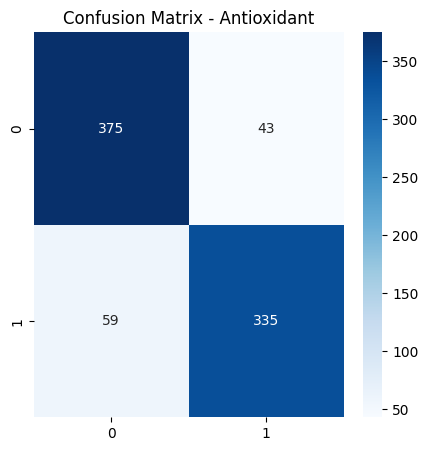

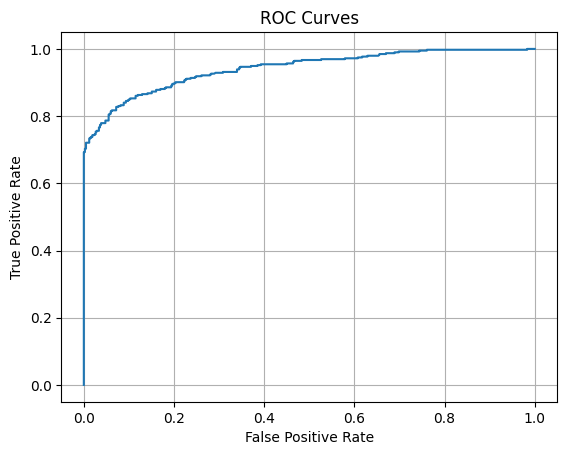

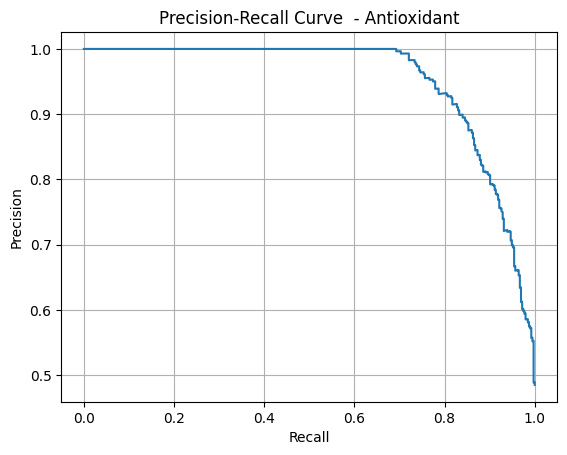


=== Anti-inflammatory ===
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       403
           1       0.92      0.85      0.88       409

    accuracy                           0.88       812
   macro avg       0.89      0.88      0.88       812
weighted avg       0.89      0.88      0.88       812



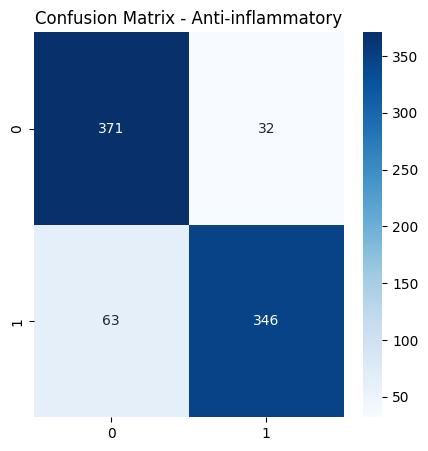

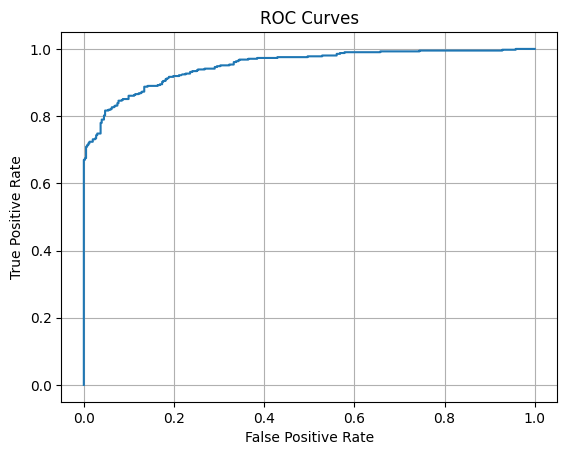

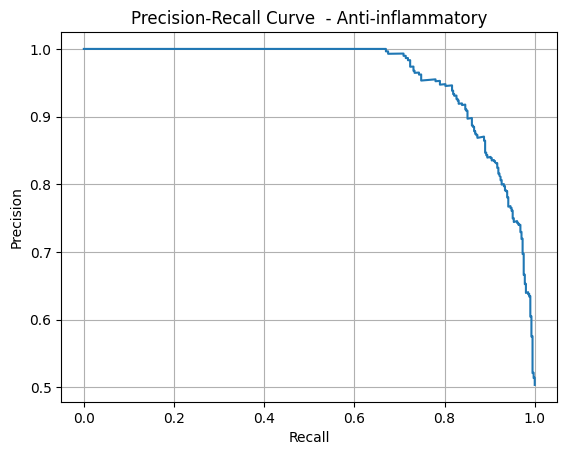


=== Toxic ===
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       431
           1       0.89      0.87      0.88       381

    accuracy                           0.89       812
   macro avg       0.89      0.89      0.89       812
weighted avg       0.89      0.89      0.89       812



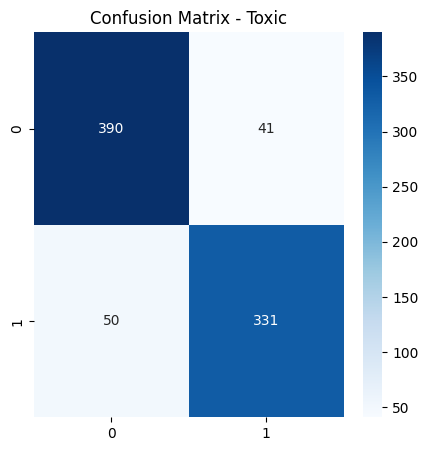

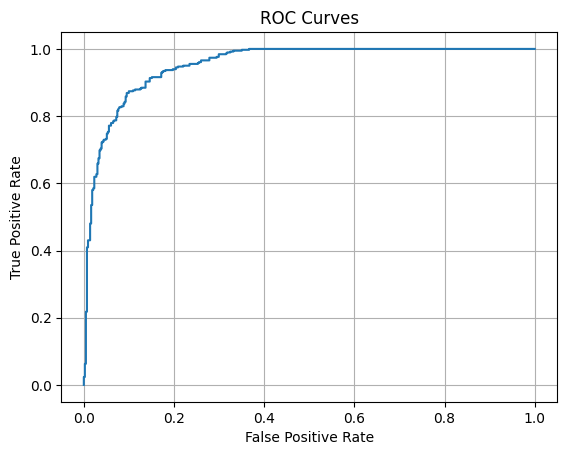

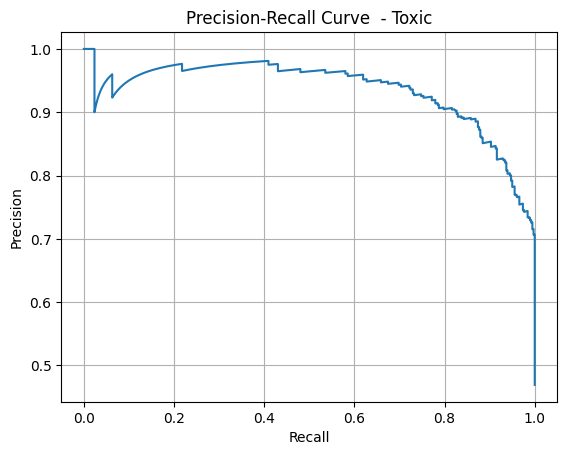

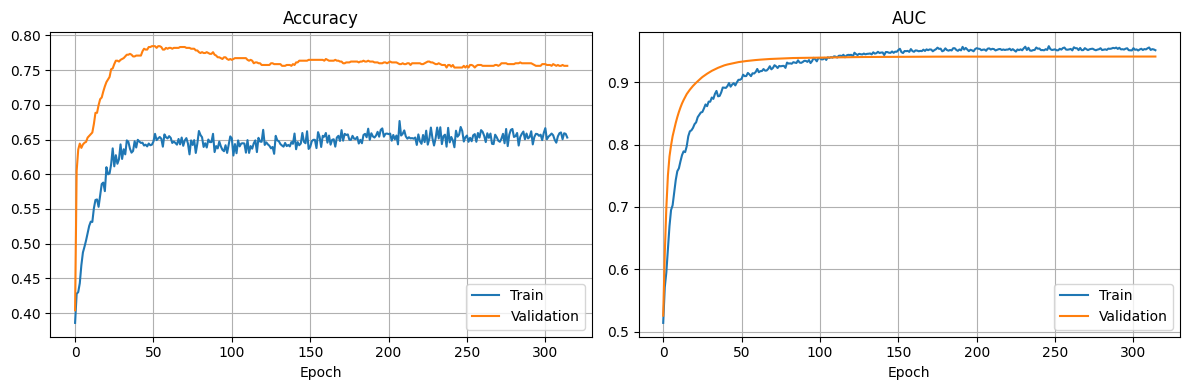

In [ ]:
# Load dataset
df = pd.read_csv("/content/QSAR-QSPR Finalized Dataset.csv")

# Generate Morgan Fingerprints
smiles_list = df["SMILES"].tolist()
generator = GetMorganGenerator(radius=2, fpSize=2048)
fps = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        fp = generator.GetFingerprint(mol)
        arr = np.zeros((2048,), dtype=int)
        ConvertToNumpyArray(fp, arr)
        fps.append(arr)
    else:
        fps.append(np.zeros((2048,), dtype=int))
fps_np = np.array(fps)

# Feature processing
selector = VarianceThreshold(threshold=0.001)
fps_filtered = selector.fit_transform(fps_np)

pca = PCA(n_components=0.95)
fps_reduced = pca.fit_transform(fps_filtered)
fingerprint_df = pd.DataFrame(fps_reduced, columns=[f'FP_PCA_{i}' for i in range(fps_reduced.shape[1])])

# Prepare data
df = df.drop(columns=["IUPAC_NAME", "NAME", "SMILES"])
target_cols = ['Antioxidant', 'Anti-inflammatory', 'Toxic']
df[target_cols] = df[target_cols].astype(int)

descriptor_features = df.drop(columns=target_cols).select_dtypes(include='number')
features = pd.concat([descriptor_features.reset_index(drop=True), fingerprint_df.reset_index(drop=True)], axis=1)
y = df[target_cols].values

# Train/Val/Test Split
X_temp, X_test, y_temp, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42, stratify=y.sum(axis=1))
X_train_base, X_val_holdout, y_train_base, y_val_holdout = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp.sum(axis=1))

# Preprocessing
imputer = KNNImputer(n_neighbors=5)
scaler = StandardScaler()

features_processed = imputer.fit_transform(features)
features_processed = scaler.fit_transform(features_processed)

# Re-split after preprocessing
X_temp, X_test, y_temp, y_test = train_test_split(
    features_processed, y, test_size=0.2, random_state=42, stratify=y.sum(axis=1))
X_train_base, X_val_holdout, y_train_base, y_val_holdout = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp.sum(axis=1))

# Feature selection
selector = SelectKBest(mutual_info_classif, k=100)
X_train_base = selector.fit_transform(X_train_base, y_train_base.sum(axis=1))
X_val_holdout = selector.transform(X_val_holdout)
X_test = selector.transform(X_test)

# Model architecture
def build_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        tf.keras.layers.Dense(256, kernel_regularizer=l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, kernel_regularizer=l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, kernel_regularizer=l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(3, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Compute class weights
class_weights = []
for i in range(3):
    weights = compute_class_weight('balanced', classes=np.unique(y_train_base[:,i]), y=y_train_base[:,i])
    class_weights.append(dict(enumerate(weights)))

# K-Fold Cross Validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
stratify_labels = y_train_base.sum(axis=1)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, stratify_labels)):
    print(f"\n=== Fold {fold+1}/3 ===")

    X_train, X_val = X_train_base[train_idx], X_train_base[val_idx]
    y_train, y_val = y_train_base[train_idx], y_train_base[val_idx]

    model_fold = build_model(X_train.shape[1])

    early_stop = EarlyStopping(monitor='val_auc', patience=50, restore_best_weights=True, mode='max')
    reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=10, min_lr=1e-6, verbose=1, mode='max')
    checkpoint = ModelCheckpoint(f'best_model_fold{fold}.h5', monitor='val_auc', save_best_only=True, mode='max')

    # Calculate sample weights
    sample_weights = np.ones(len(y_train))
    for i in range(3):
        sample_weights *= np.array([class_weights[i][int(cls)] for cls in y_train[:,i]])

    history = model_fold.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=1000,
        batch_size=256,
        callbacks=[early_stop, reduce_lr, checkpoint],
        sample_weight=sample_weights,
        verbose=1
    )

    y_val_pred_prob = model_fold.predict(X_val)
    print("Fold ROC AUCs:")
    fold_auc = []
    for i, label in enumerate(target_cols):
        auc = roc_auc_score(y_val[:, i], y_val_pred_prob[:, i])
        print(f"{label}: {auc:.4f}")
        fold_auc.append(auc)
    fold_metrics.append(fold_auc)

# Final model training
final_model = build_model(X_train_base.shape[1])

# Calculate final sample weights
sample_weights = np.ones(len(y_train_base))
for i in range(3):
    sample_weights *= np.array([class_weights[i][int(cls)] for cls in y_train_base[:,i]])

history_final = final_model.fit(
    X_train_base, y_train_base,
    validation_data=(X_val_holdout, y_val_holdout),
    epochs=1000,
    batch_size=256,
    callbacks=[early_stop, reduce_lr, checkpoint],
    sample_weight=sample_weights,
    verbose=1
)

final_model.save('best_model_final.h5')

# Evaluation
y_pred_prob = final_model.predict(X_test)

# Find optimal thresholds
thresholds = []
for i in range(3):
    f1_scores = [f1_score(y_test[:,i], y_pred_prob[:,i] > t) for t in np.linspace(0.1, 0.9, 50)]
    optimal_threshold = np.linspace(0.1, 0.9, 50)[np.argmax(f1_scores)]
    thresholds.append(optimal_threshold)
    print(f"Optimal threshold for {target_cols[i]}: {thresholds[i]:.3f}")

y_pred = (y_pred_prob > thresholds).astype(int)

# Metrics
for i, label in enumerate(target_cols):
    auc = roc_auc_score(y_test[:, i], y_pred_prob[:, i])
    print(f"{label} ROC AUC: {auc:.4f}")

for i, label in enumerate(target_cols):
    print(f"\n=== {label} ===")
    print(classification_report(y_test[:, i], y_pred[:, i]))

    # Confusion Matrix
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {label}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.grid(True)
    plt.show()

    # PR Curve
    precisions, recalls, _ = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve  - {label}")
    plt.grid(True)
    plt.show()

# Training History Plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_final.history['accuracy'], label='Train')
plt.plot(history_final.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_final.history['auc'], label='Train')
plt.plot(history_final.history['val_auc'], label='Validation')
plt.title('AUC')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()